# Модуль 1

In [757]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Загрузка данных

In [758]:
test_df = pd.read_csv(f'Regression\\test.csv')
train_df = pd.read_csv(f'Regression\\train.csv')

In [759]:
print(f'Размерность тестового набора данных: {test_df.shape}')
print(f'Размерность тренировочного набора данных: {train_df.shape}')

Размерность тестового набора данных: (1459, 80)
Размерность тренировочного набора данных: (1460, 81)


Срез данных

In [760]:
train_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Определение типа данных в каждом признаке

In [761]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [762]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Данные содержат переменные следующих типов:

1. Целочисленный (int64). Числовые дискретные признаки, некоторые признаки порядковые, например OverallQual, OverallCond. Содержится один категориальный признак MSSubClass - это нужно учесть при дальнейшем анализе.

2. Строковый (object). 43 строковых признака. Тут присутсвуют как категориальные признаки, так и признаки, на кторых можно задать порядок, например описывающие состояние(Excellent, Good, Average/Typical, Fair, Po) такие как ExterCond. В дальнейшем будут преобразованы к порядковым числовым признакам.

3. Вещественный (float64). 11 признаков являются числовыми непрерывными.

Всего данные содержат 79 признаков

Данные содержат целевую перемнную SalePrice, которую необходимо предсказывать.

## Опредление пропусков в данных

Видно, что некоторые признаки содержат много пропусков, например Alley. Определим признаки, которые содержат пропуски:

In [763]:
(train_df.isna().sum()/len(train_df)).sort_values(ascending=False).head(30)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
MasVnrType     0.60
FireplaceQu    0.47
LotFrontage    0.18
GarageYrBlt    0.06
GarageCond     0.06
GarageType     0.06
GarageFinish   0.06
GarageQual     0.06
BsmtFinType2   0.03
BsmtExposure   0.03
BsmtQual       0.03
BsmtCond       0.03
BsmtFinType1   0.03
MasVnrArea     0.01
Electrical     0.00
Id             0.00
Functional     0.00
Fireplaces     0.00
KitchenQual    0.00
KitchenAbvGr   0.00
BedroomAbvGr   0.00
HalfBath       0.00
FullBath       0.00
BsmtHalfBath   0.00
TotRmsAbvGrd   0.00
GarageCars     0.00
dtype: float64

В обучающих данных присутсвуют пропуски в столбцах:

PoolQC          
MiscFeature     
Alley          
Fence           
MasVnrType      
FireplaceQu  
LotFrontage     
GarageYrBlt     
GarageCond      
GarageType      
GarageFinish    
GarageQual      
BsmtFinType2    
BsmtExposure    
BsmtQual        
BsmtCond        
BsmtFinType1    
MasVnrArea      
Electrical

Наибольшее число пропусков содержится в столбцах
- PoolQC - 99%      
- MiscFeature - 96%
- Alley - 93%   
- Fence - 80%     
- MasVnrType - 59%
- FireplaceQu - 47%

Эти столбцы следует удалить, так как восстановление такой большой части данных может повлечь искажение данных, что скажется на модели.

Остальные столбцы, содержащие пропуски подлежат обработке позднее, после анализа распределний/выбросов поскольку это будет влиять на тахнику заполнения.

Для целевой переменной нет пропусков

In [764]:
train_df.SalePrice.isna().sum()

0

Удалим также колонку Id, поскольку этот признак не информативен, сщхраним отдельно для тестовой выгрузки.

In [765]:
id_test = test_df['Id']

In [766]:
columns_to_drop = [ 'Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
train_df = train_df.drop(columns=columns_to_drop)

In [767]:
print(f'Размер обучающего набора после удаления признаков с большим количеством пропусков: {train_df.shape}')

Размер обучающего набора после удаления признаков с большим количеством пропусков: (1460, 74)


Проделаем аналогичную процедуру для тестового набора данных.

In [768]:
(test_df.isna().sum()/len(test_df)).sort_values(ascending=False).head(30)

PoolQC         1.00
MiscFeature    0.97
Alley          0.93
Fence          0.80
MasVnrType     0.61
FireplaceQu    0.50
LotFrontage    0.16
GarageYrBlt    0.05
GarageQual     0.05
GarageFinish   0.05
GarageCond     0.05
GarageType     0.05
BsmtCond       0.03
BsmtQual       0.03
BsmtExposure   0.03
BsmtFinType1   0.03
BsmtFinType2   0.03
MasVnrArea     0.01
MSZoning       0.00
BsmtHalfBath   0.00
Utilities      0.00
Functional     0.00
BsmtFullBath   0.00
BsmtFinSF1     0.00
BsmtFinSF2     0.00
BsmtUnfSF      0.00
KitchenQual    0.00
TotalBsmtSF    0.00
Exterior2nd    0.00
GarageCars     0.00
dtype: float64

Большое число пропусков содержат те же колонки, удалим их.

In [769]:
test_df = test_df.drop(columns=columns_to_drop)
print(f'Размер обучающего набора после удаления признаков с большим количеством пропусков: {test_df.shape}')

Размер обучающего набора после удаления признаков с большим количеством пропусков: (1459, 73)


In [770]:
train_df['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

## Анализ распредления данных

На графике представлено распределение переменной SalePrice

- Смещенное вправо распределение, имеет длинный "хвост" справа, что означает наличие значительного количества домов с ценами выше среднего значения, с высокими ценами (например, 600,000 - 800,000), хотя их количество меньше по сравнению с основной массой данных.

- Большая часть данных (пик гистограммы) сосредоточена в диапазоне около 150,000 - 200,000 единиц.

Такое распределение может быть характерно для рынков недвижимости, где есть преобладание объектов средней стоимости, но также существуют элитные объекты с значительно более высокими ценами.

<Axes: xlabel='SalePrice', ylabel='Count'>

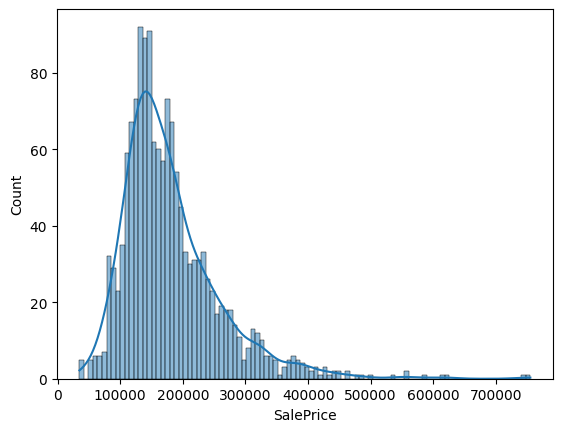

In [771]:
sns.histplot(train_df['SalePrice'], bins=100, kde=True)

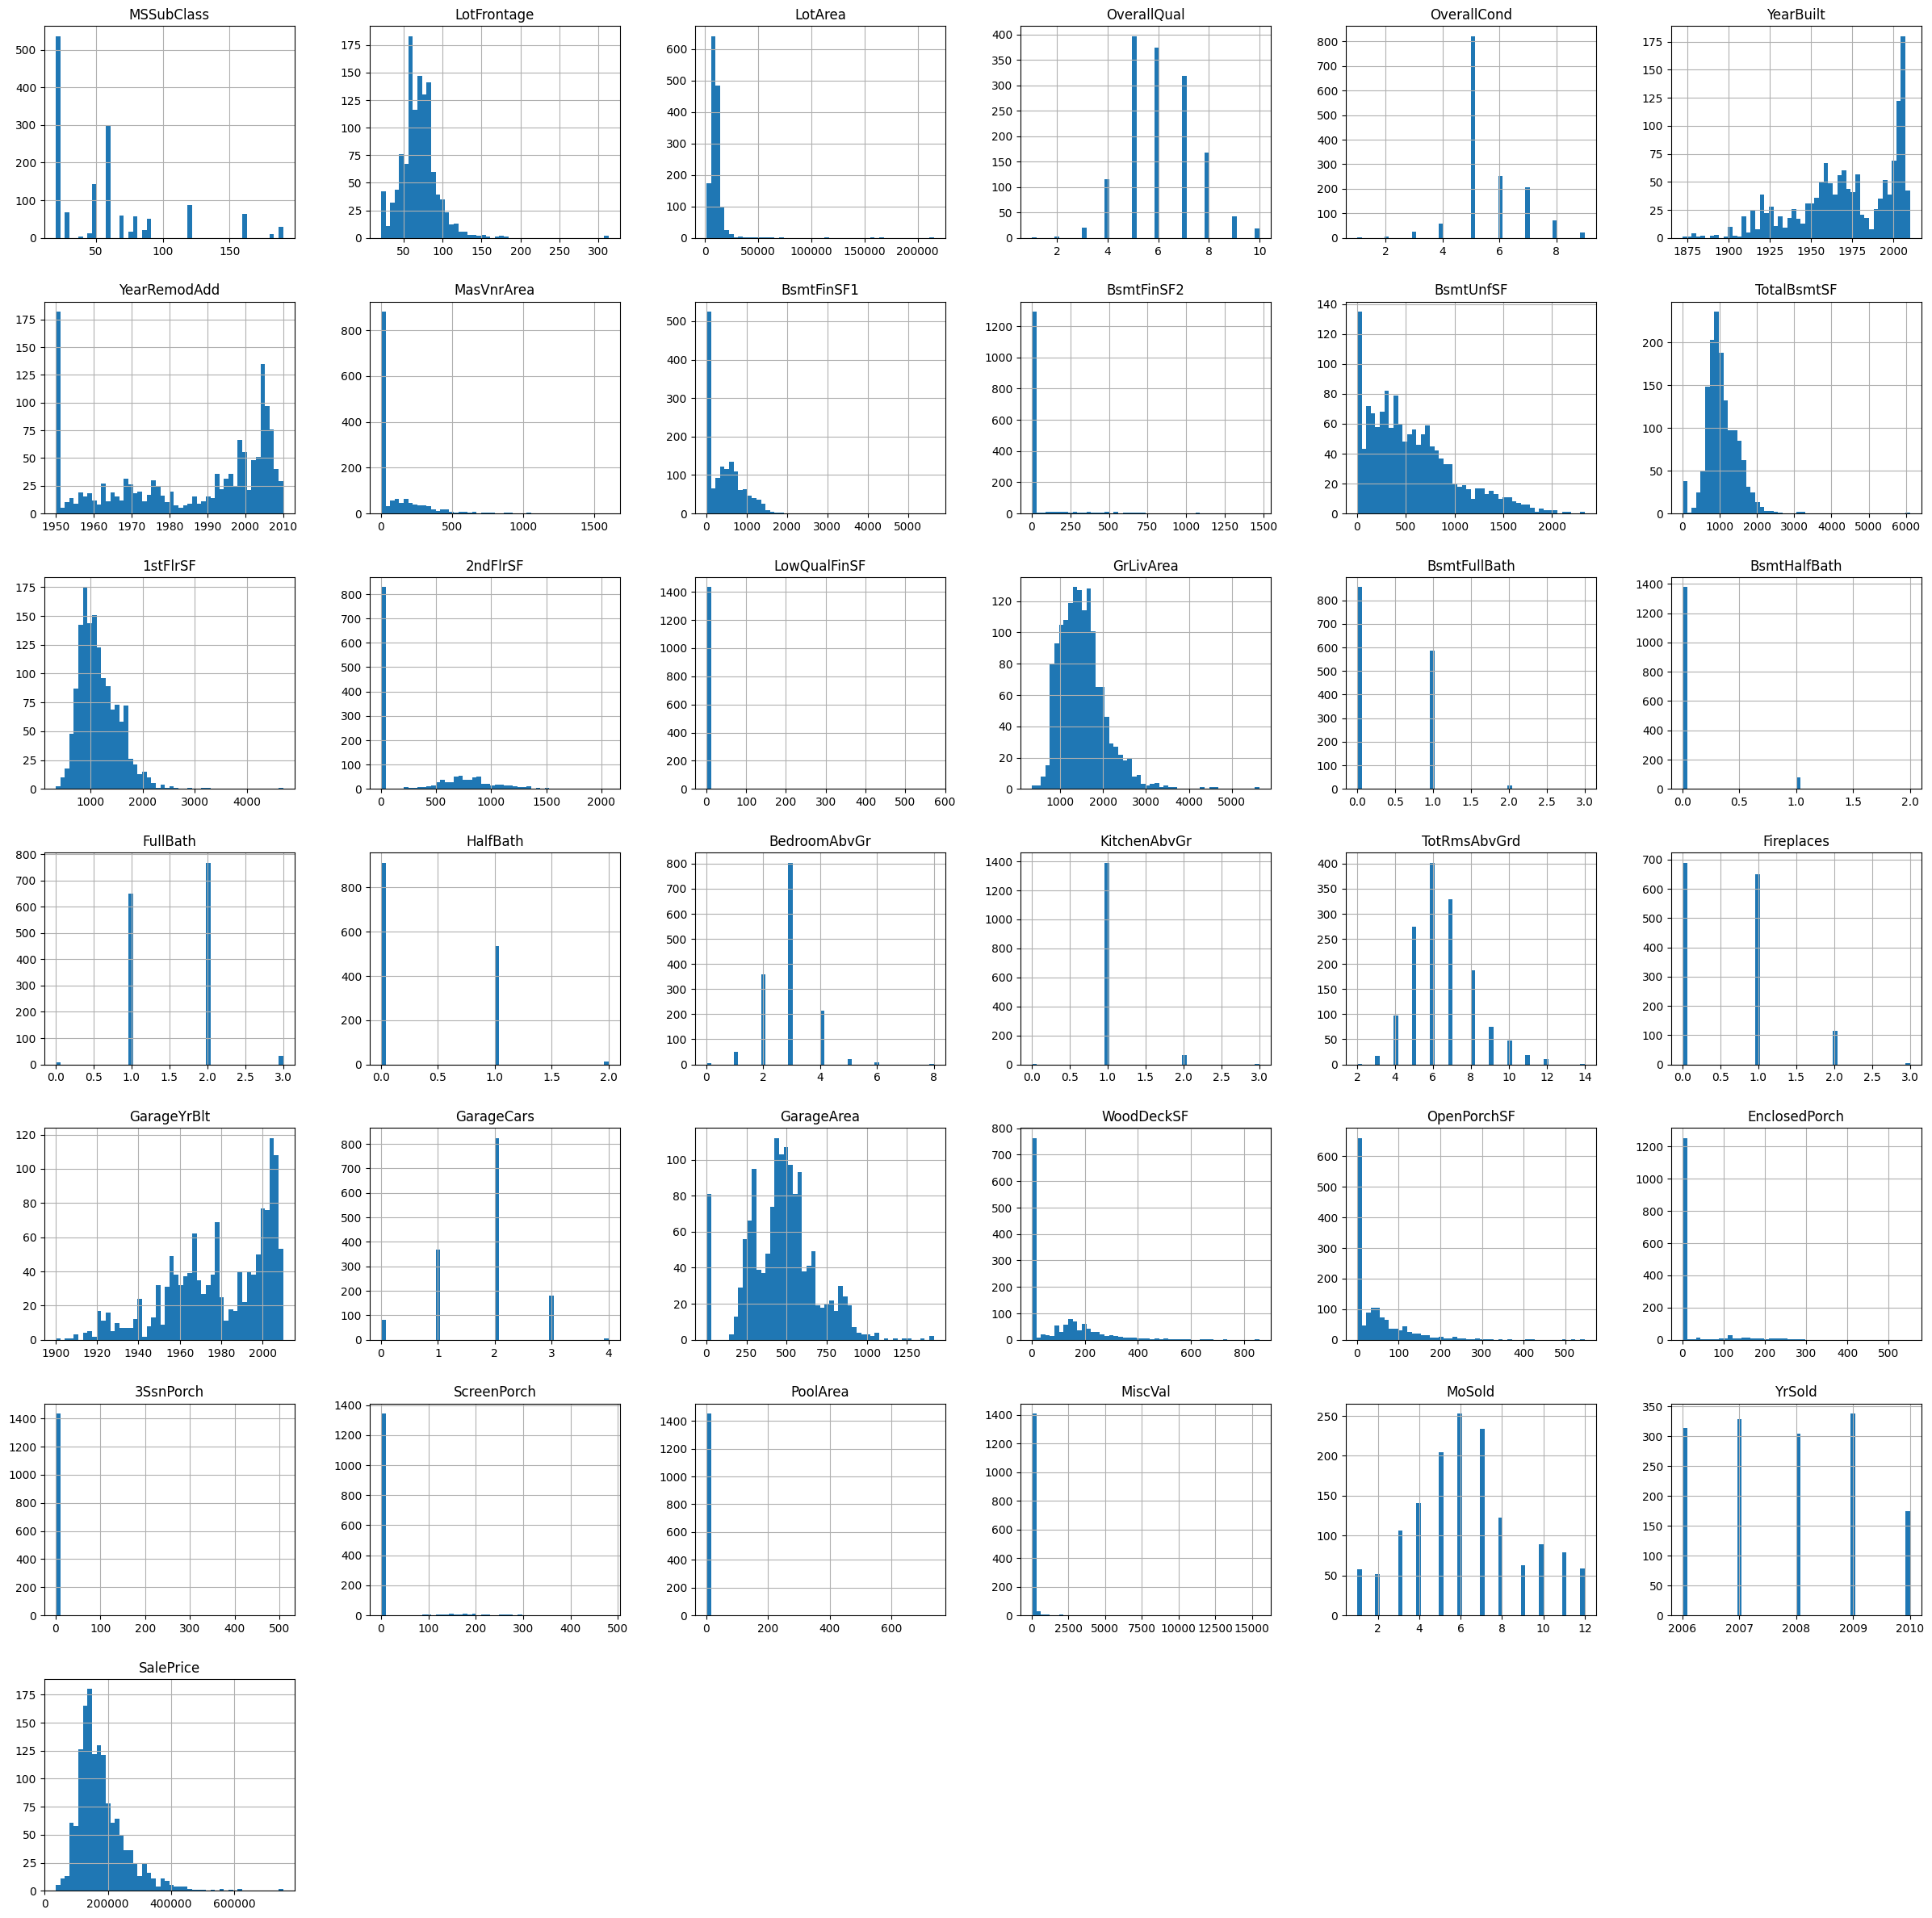

In [772]:
num_features = train_df.select_dtypes(['float64', 'int'])
ax = num_features.hist(figsize=(30,30), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

В наборе данных присутсвуют как непрерывные, так и дискретные признаки. Непрерывные признаки в основном имеют ассиметричное распределение.

## Поиск зависимостей в данных

### Корреляционный анализ для порядковых и непрерывных числовых признаков

#### Подготовка данных. Изменение типа

Для оценки корреляции между числовыми признакми построим матрицу корреляций, сильно скоррелированные признаки удалим из набора данных.
Можно оценить монотонные зависимости в признаках с помощью с мощью корреляции Спирмана, некоторые катеогриальные признаки можно преоразовать в порядковые и включить в корреляционный анализ. Это признаки, которые связаны с состоянием, например:

- PoolQC
- GarageCond
- GarageQual
- FireplaceQu
- KitchenQual
- и др.

In [774]:
quality = {
    'Ex':	5,
    'Gd':	4,
    'TA':	3,
    'Av':   3,
    'Fa':	2,
    'Po':	1,
    'Mn':   1,
    'NA':	0,
    'No':   0
}

ordinal_columns = train_df.columns[train_df.isin(list(quality.keys())[:-1]).any()]
#ordinal = train_df.loc[:, train_df.isin(quality.keys()).any()]
train_df[ordinal_columns] = train_df[ordinal_columns].replace(quality)
test_df[ordinal_columns] = train_df[ordinal_columns].replace(quality)


#### Матрица корреляций

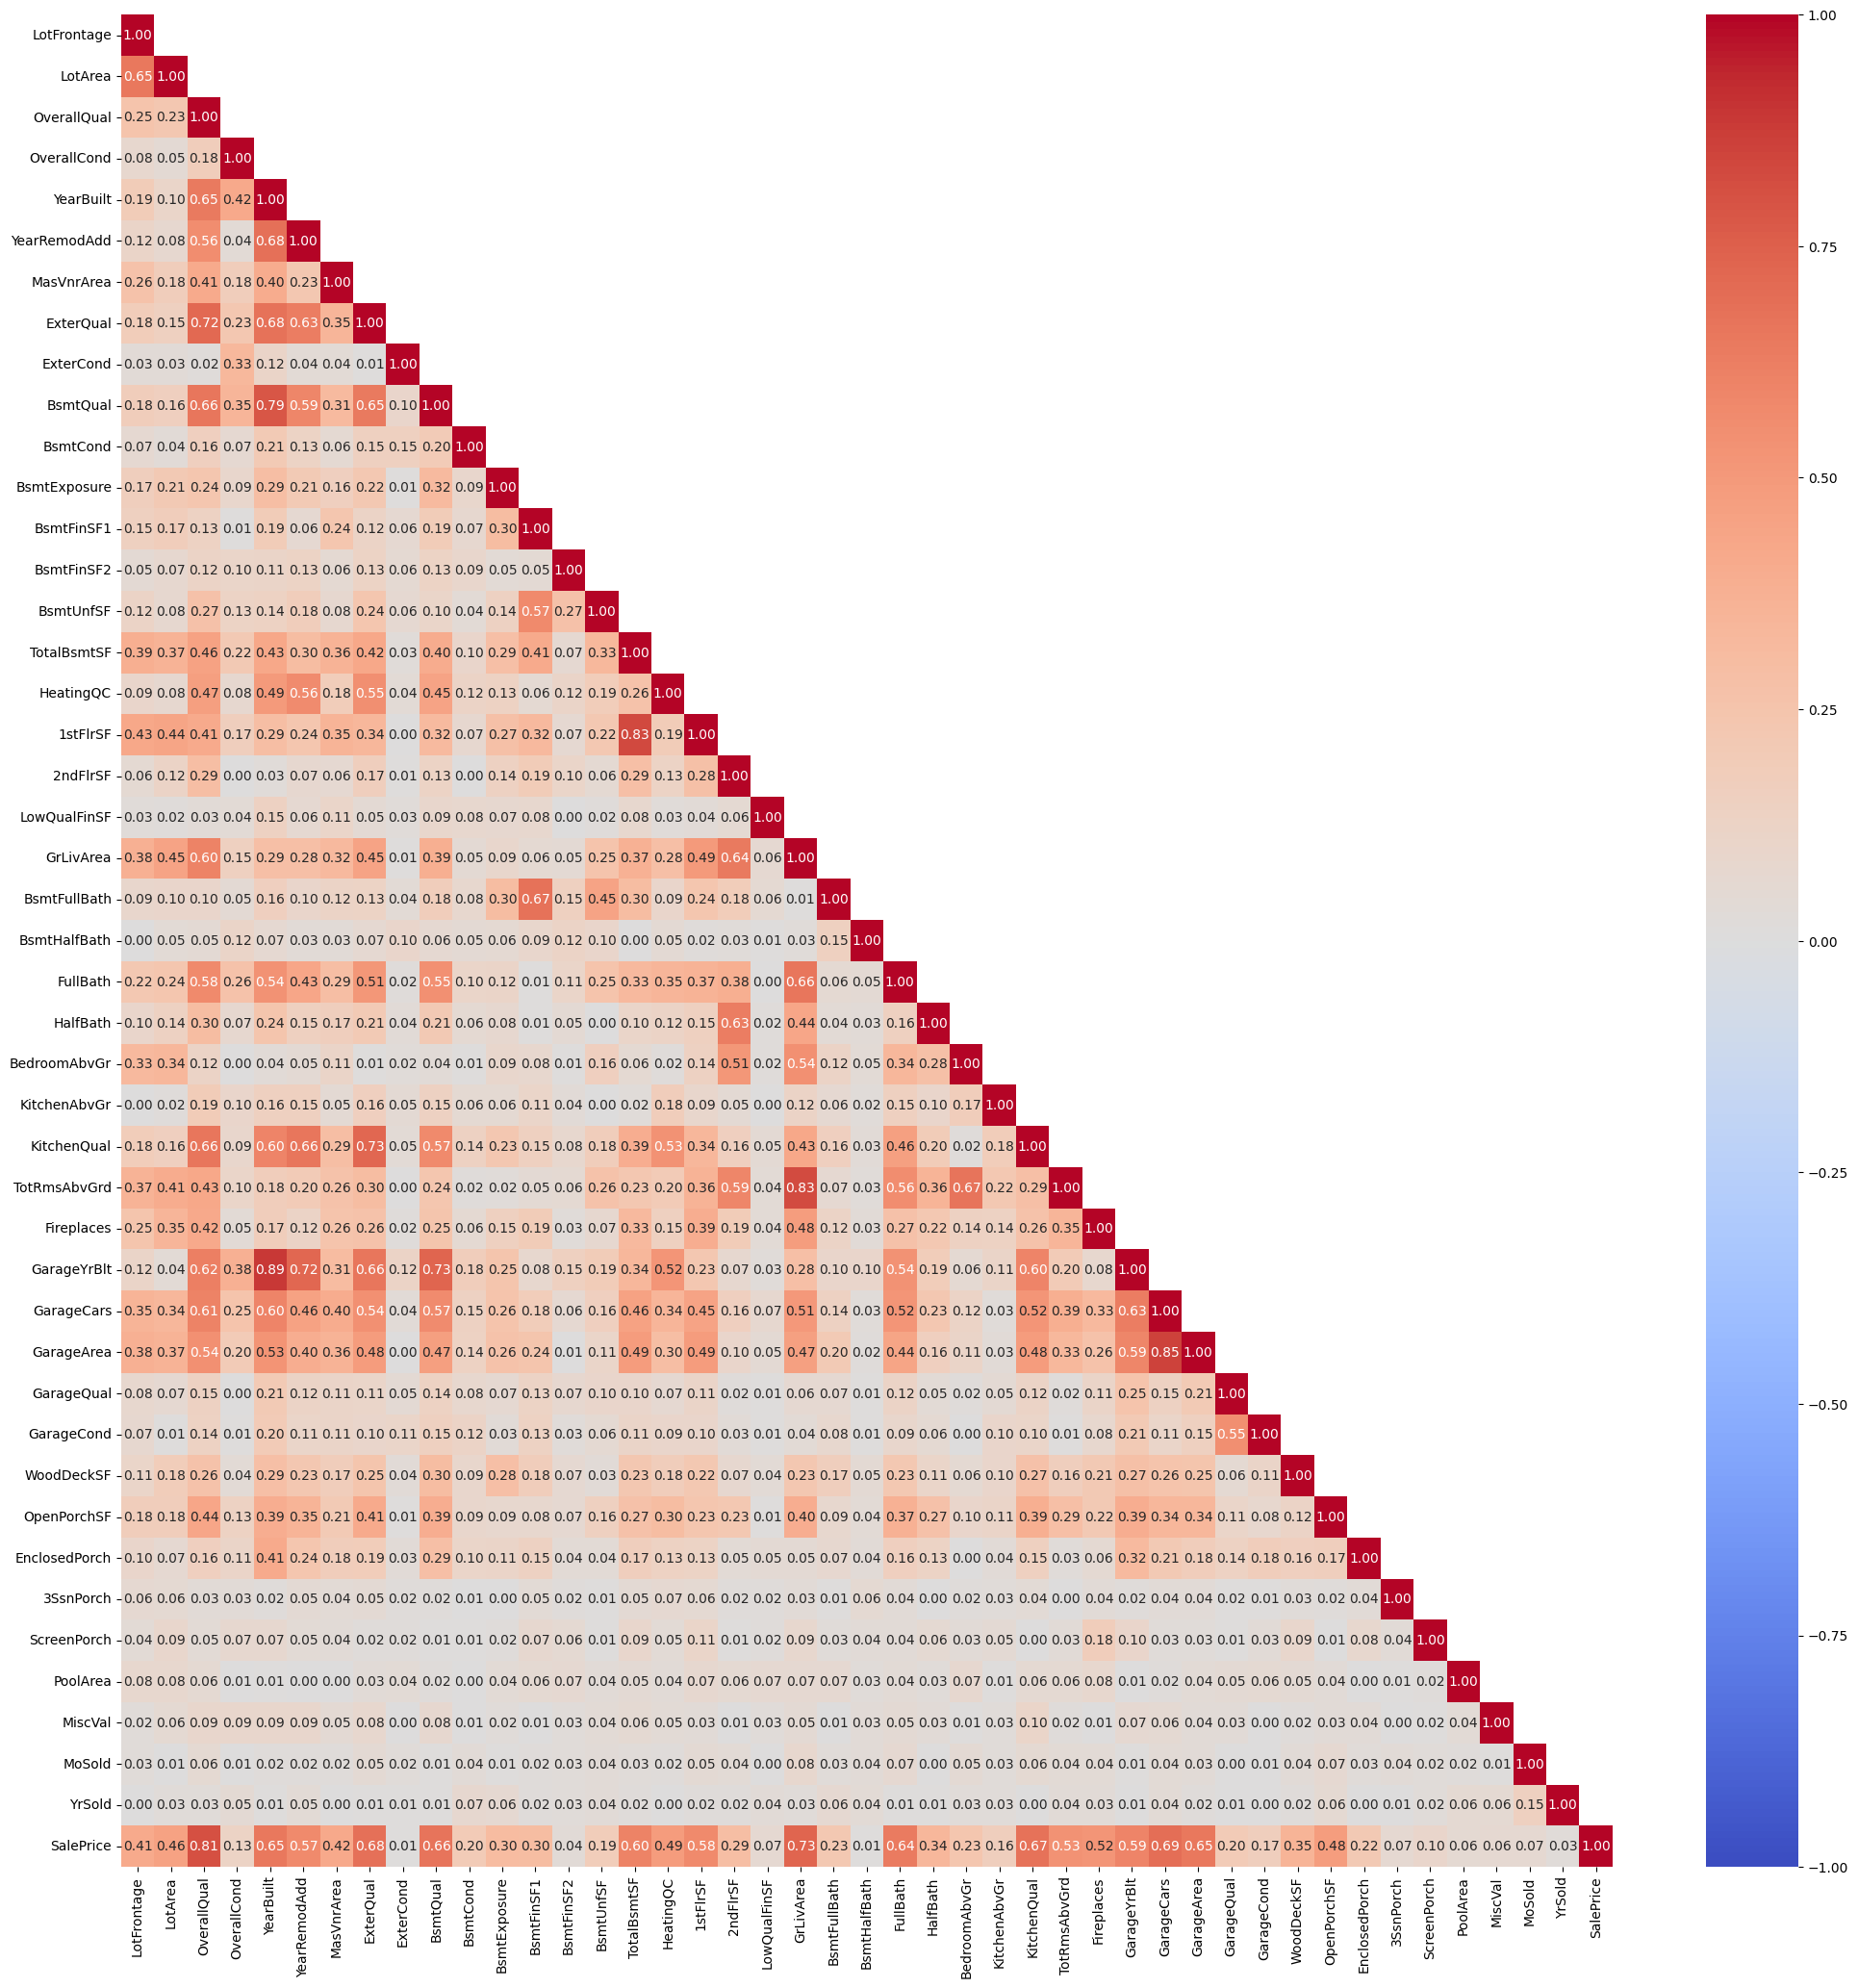

In [775]:
num_features = train_df.select_dtypes(['float64','int'])
num_features = num_features.drop(columns=['MSSubClass']) # категориальный признак представленный целочисленным значением
corr_matrix = num_features.corr('spearman').abs()
corr_tr = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize = (25,25))
ax =sns.heatmap(corr_matrix.abs(), mask=corr_tr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.show()

Для оценки тесноты связи может использоваться шкала Чеддока:
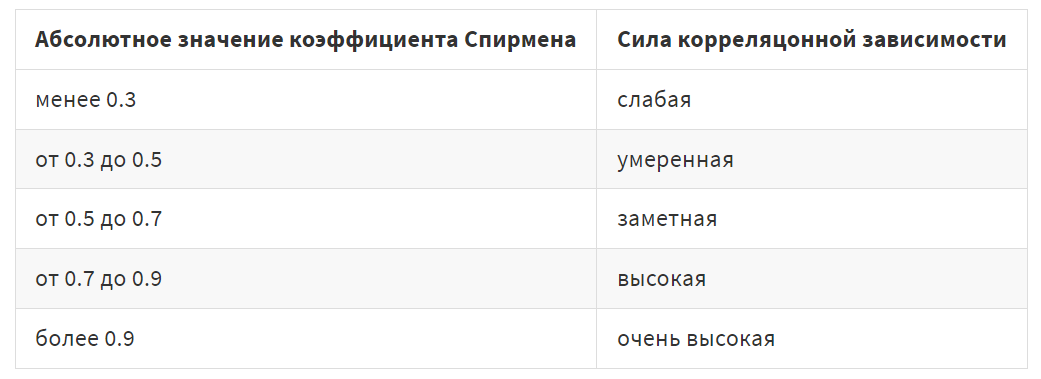

#### Взаимосвязь с целевой переменной

C:\Users\zyryanova.anastasiya\AppData\Local\Temp\ipykernel_20000\2663839936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(target_correlation,palette="Spectral")


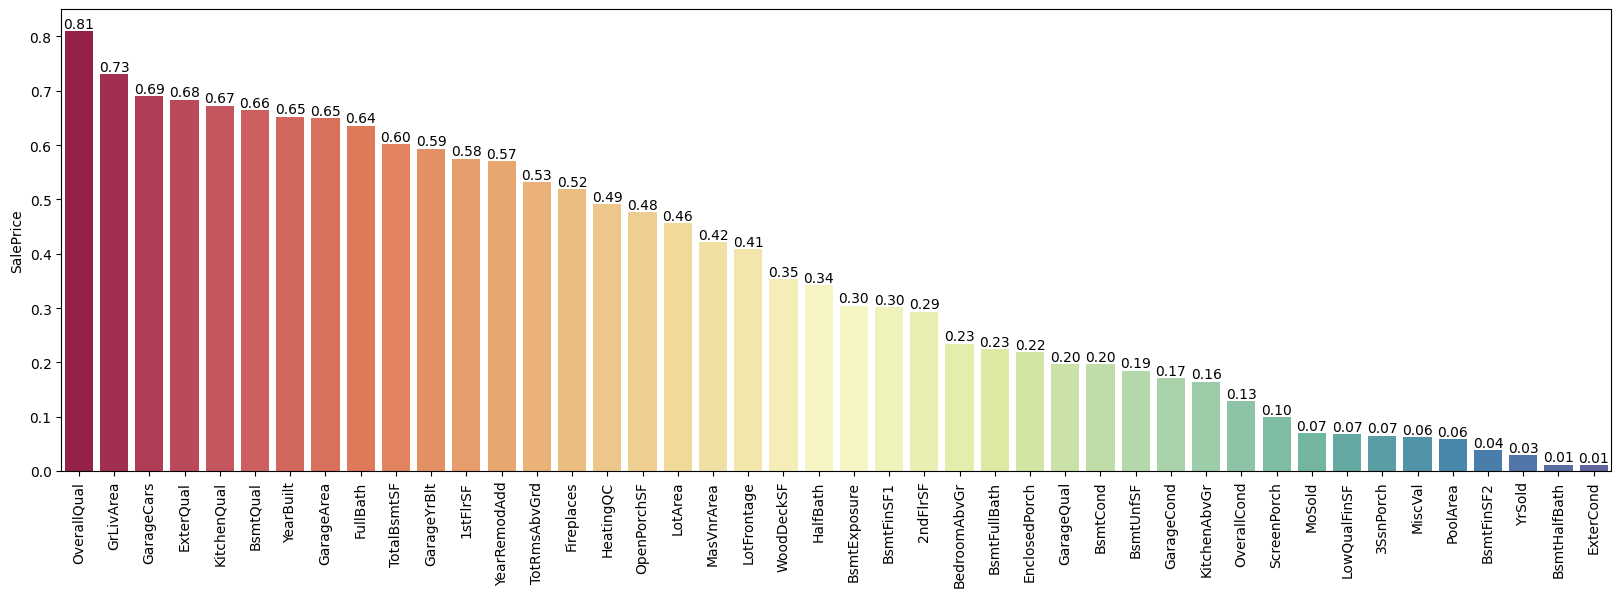

In [776]:
target_correlation = corr_matrix.SalePrice.sort_values(ascending=False)
target_correlation = target_correlation.drop('SalePrice')
plt.figure(figsize=(20,6))
ax = sns.barplot(target_correlation,palette="Spectral")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

Определим высоко скоррелированные признаки с учетом статистической значимости, в случае если p_value < 0.05 коррелацию можно считать не случайной.

In [777]:
from  scipy.stats import spearmanr
p_values_df = pd.DataFrame(data=np.ones_like(corr_matrix),index=corr_matrix.index, columns=corr_matrix.columns)
np.set_printoptions(precision=2, floatmode='fixed')
pd.set_option('display.float_format', '{:.2f}'.format)
r = spearmanr(np.asarray(num_features.dropna()))
p_values_df = pd.DataFrame(data=r.pvalue,index=corr_matrix.index, columns=corr_matrix.columns)


Высоко скоррелированные статистически заничимые признаки:

In [778]:
p_value = 0.05
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] >= 0.7 and p_values_df.iloc[i,j] < p_value  and corr_matrix.columns[j]!='SalePrice' and corr_matrix.columns[i]!='SalePrice':
            print(corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i,j])



OverallQual ExterQual 0.7159882308301456
YearBuilt BsmtQual 0.7878684392652776
YearBuilt GarageYrBlt 0.8905463872089358
YearRemodAdd GarageYrBlt 0.7223769820848751
ExterQual KitchenQual 0.725266498018657
BsmtQual GarageYrBlt 0.7301269646536047
TotalBsmtSF 1stFlrSF 0.8292919303569337
GrLivArea TotRmsAbvGrd 0.8278743231158384
GarageCars GarageArea 0.8533173766076402


#### Удаление сильно скоррелированных признаков

Удалим признаки, учитывая зависимости с целевой переменной:
- В паре признаков OverallQual ExterQual оставим OverallQual
- В паре признаков YearBuilt BsmtQual оставим YearBuilt
- В паре признаков YearBuilt GarageYrBlt оставим YearBuilt
- В паре признаков BsmtQual GarageYrBlt оставим BsmtQual
- В паре признаков YearRemodAdd GarageYrBlt оставим YearRemodAdd
- В паре признаков ExterQual KitchenQual оставим ExterQual
- В паре признаков TotalBsmtSF 1stFlrSF оставим TotalBsmtSF
- В паре признаков GrLivArea TotRmsAbvGrd оставим GrLivArea
- В паре признаков GarageCars GarageArea оставим GarageArea

In [779]:
columns_to_drop = ['ExterQual', 'BsmtQual', 'GarageYrBlt', 'KitchenQual', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars']
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [780]:
train_df['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

### Корреляция между категориальными переменными

Корреляция между категориальными переменными не может быть измерена с помощью коэффициентов Пирсона, Спирмена и Кендалла. 
Коэффициенты и выводы для категориальных данных обычно строятся на основании таблиц сопряжённости. 

Базовый подход - проверить гипотезу о независимости категорий с помощью статистических  тестов (тест χ²-тест, тест Фишера), далее вычислить показатели степени тесноты статистической связи: коэффициент ассоциации, коэффициент контингенции, коэффициент коллигации, коэффициент Гудмена-Краскала.



#### Подготовка данных. Изменение типа
Произведем бинирование целевой перемнной для анализа зависимостей категориальных признаков с ней

In [781]:
# Только категориальные признаки
categorical = train_df.select_dtypes(['object'])
categorical['MSSubClass'] = train_df['MSSubClass']
# Определение границ бинов с более широким последним интервалом
custom_bin_edges = [train_df['SalePrice'].min(), 
                    train_df['SalePrice'].quantile(0.1), 
                    train_df['SalePrice'].quantile(0.7), 
                    train_df['SalePrice'].quantile(0.95), 
                    train_df['SalePrice'].max()]

custom_bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Создание бинов
categorical['SalePrice_category'] = pd.cut(train_df['SalePrice'], labels = custom_bin_labels, bins=custom_bin_edges,  include_lowest=True)

Визуализация разбиения

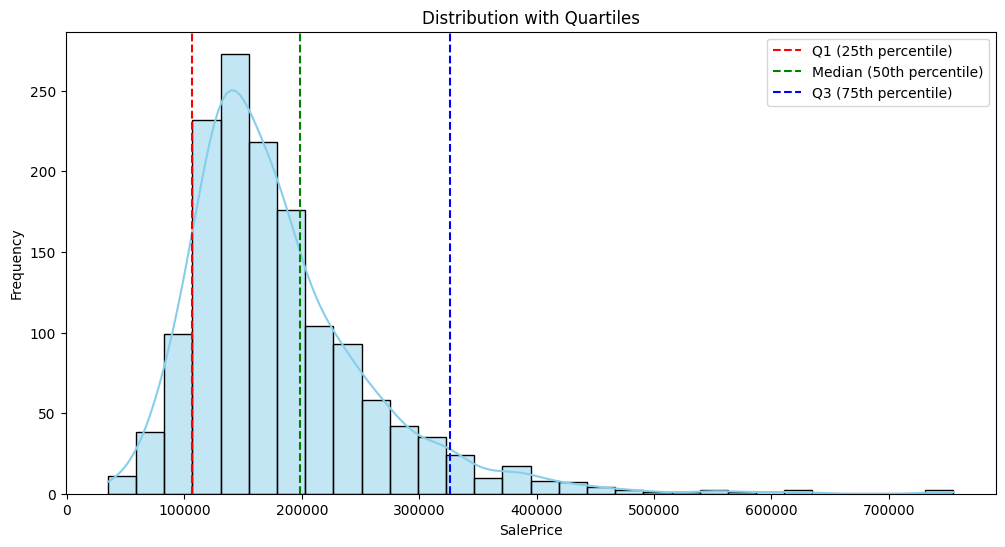

Data amount between min and Q1: 146
Data amount between Q1 and Q2: 876
Data amount between Q2 and Q3: 365
Data amount between Q3 and max: 73


In [782]:
q1 = train_df['SalePrice'].quantile(0.1)
q2 = train_df['SalePrice'].quantile(0.7)
q3 = train_df['SalePrice'].quantile(0.95)
min_val = train_df['SalePrice'].min()
max_val = train_df['SalePrice'].max()

# Подсчет количества данных в интервалах
count_min_q1 = train_df[train_df['SalePrice'] <= q1].shape[0]
count_q1_q2 = train_df[(train_df['SalePrice'] > q1) & (train_df['SalePrice'] <= q2)].shape[0]
count_q2_q3 = train_df[(train_df['SalePrice'] > q2) & (train_df['SalePrice'] <= q3)].shape[0]
count_q3_max = train_df[train_df['SalePrice'] > q3].shape[0]

# Построение графика
plt.figure(figsize=(12, 6))

sns.histplot(train_df['SalePrice'], bins=30, kde=True, color='skyblue')

plt.axvline(q1, color='r', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q2, color='g', linestyle='--', label='Median (50th percentile)')
plt.axvline(q3, color='b', linestyle='--', label='Q3 (75th percentile)')
plt.legend()
plt.title('Distribution with Quartiles')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

print(f"Data amount between min and Q1: {count_min_q1}")
print(f"Data amount between Q1 and Q2: {count_q1_q2}")
print(f"Data amount between Q2 and Q3: {count_q2_q3}")
print(f"Data amount between Q3 and max: {count_q3_max}")

In [783]:
categorical

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... CentralAir Electrical Functional  \
0         CollgCr       Norm       Norm  ...          Y      SBrkr        Typ   
1         Veenker      Feedr       Norm  ...          Y      SBrkr        Typ   
2         CollgCr       Norm       Norm  ...          Y      SBrkr        Typ   
3         Crawfor       Norm       Norm  ...          Y      SBrkr        Typ   
4         NoRidge       Norm       Norm  ...          Y      SBrkr        Typ   
...           ...        ...        ...  ...        ...        ...        ...   
1455      Gilbert       Norm       Norm  ...          Y      SBrkr        Typ   
1456       NWAmes       Norm       Norm  ...          Y      SBrkr       Min1   
1457      Crawfor       Norm       Norm  ...          Y      SBrkr        Typ   
1458        NAmes       Norm       Norm  ...          Y      FuseA        Typ   
1459      Edwards       Norm       Norm  ...          Y      SBrkr        Typ   

     GarageType GarageFinish PavedDrive SaleType SaleCondition MSSubClass  \
0        Attchd          RFn          Y       WD        Normal         60   
1        Attchd          RFn          Y       WD        Normal         20   
2        Attchd          RFn          Y       WD        Normal         60   
3        Detchd          Unf          Y       WD       Abnorml         70   
4        Attchd          RFn          Y       WD        Normal         60   
...         ...          ...        ...      ...           ...        ...   
1455     Attchd          RFn          Y       WD        Normal         60   
1456     Attchd          Unf          Y       WD        Normal         20   
1457     Attchd          RFn          Y       WD        Normal         70   
1458     Attchd          Unf          Y       WD        Normal         20   
1459     Attchd          Fin          Y       WD        Normal         20   

     SalePrice_category  
0                  High  
1                Medium  
2                  High  
3                Medium  
4                  High  
...                 ...  
1455             Medium  
1456               High  
1457               High  
1458             Medium  
1459             Medium  

[1460 rows x 30 columns]

#### χ²-тест и рассчет ассоциации Крамера

Он предполагает, что категории независимы, и чем меньше p-value, тем сильнее свидетельство против этой гипотезы. Если p-value меньше уровня значимости (например, 0.05), можно считать, что между переменными есть статистически значимая зависимость.
Также рассчитаем коэффициент ассоциации Крамера для оапредения силы связи между категориями.


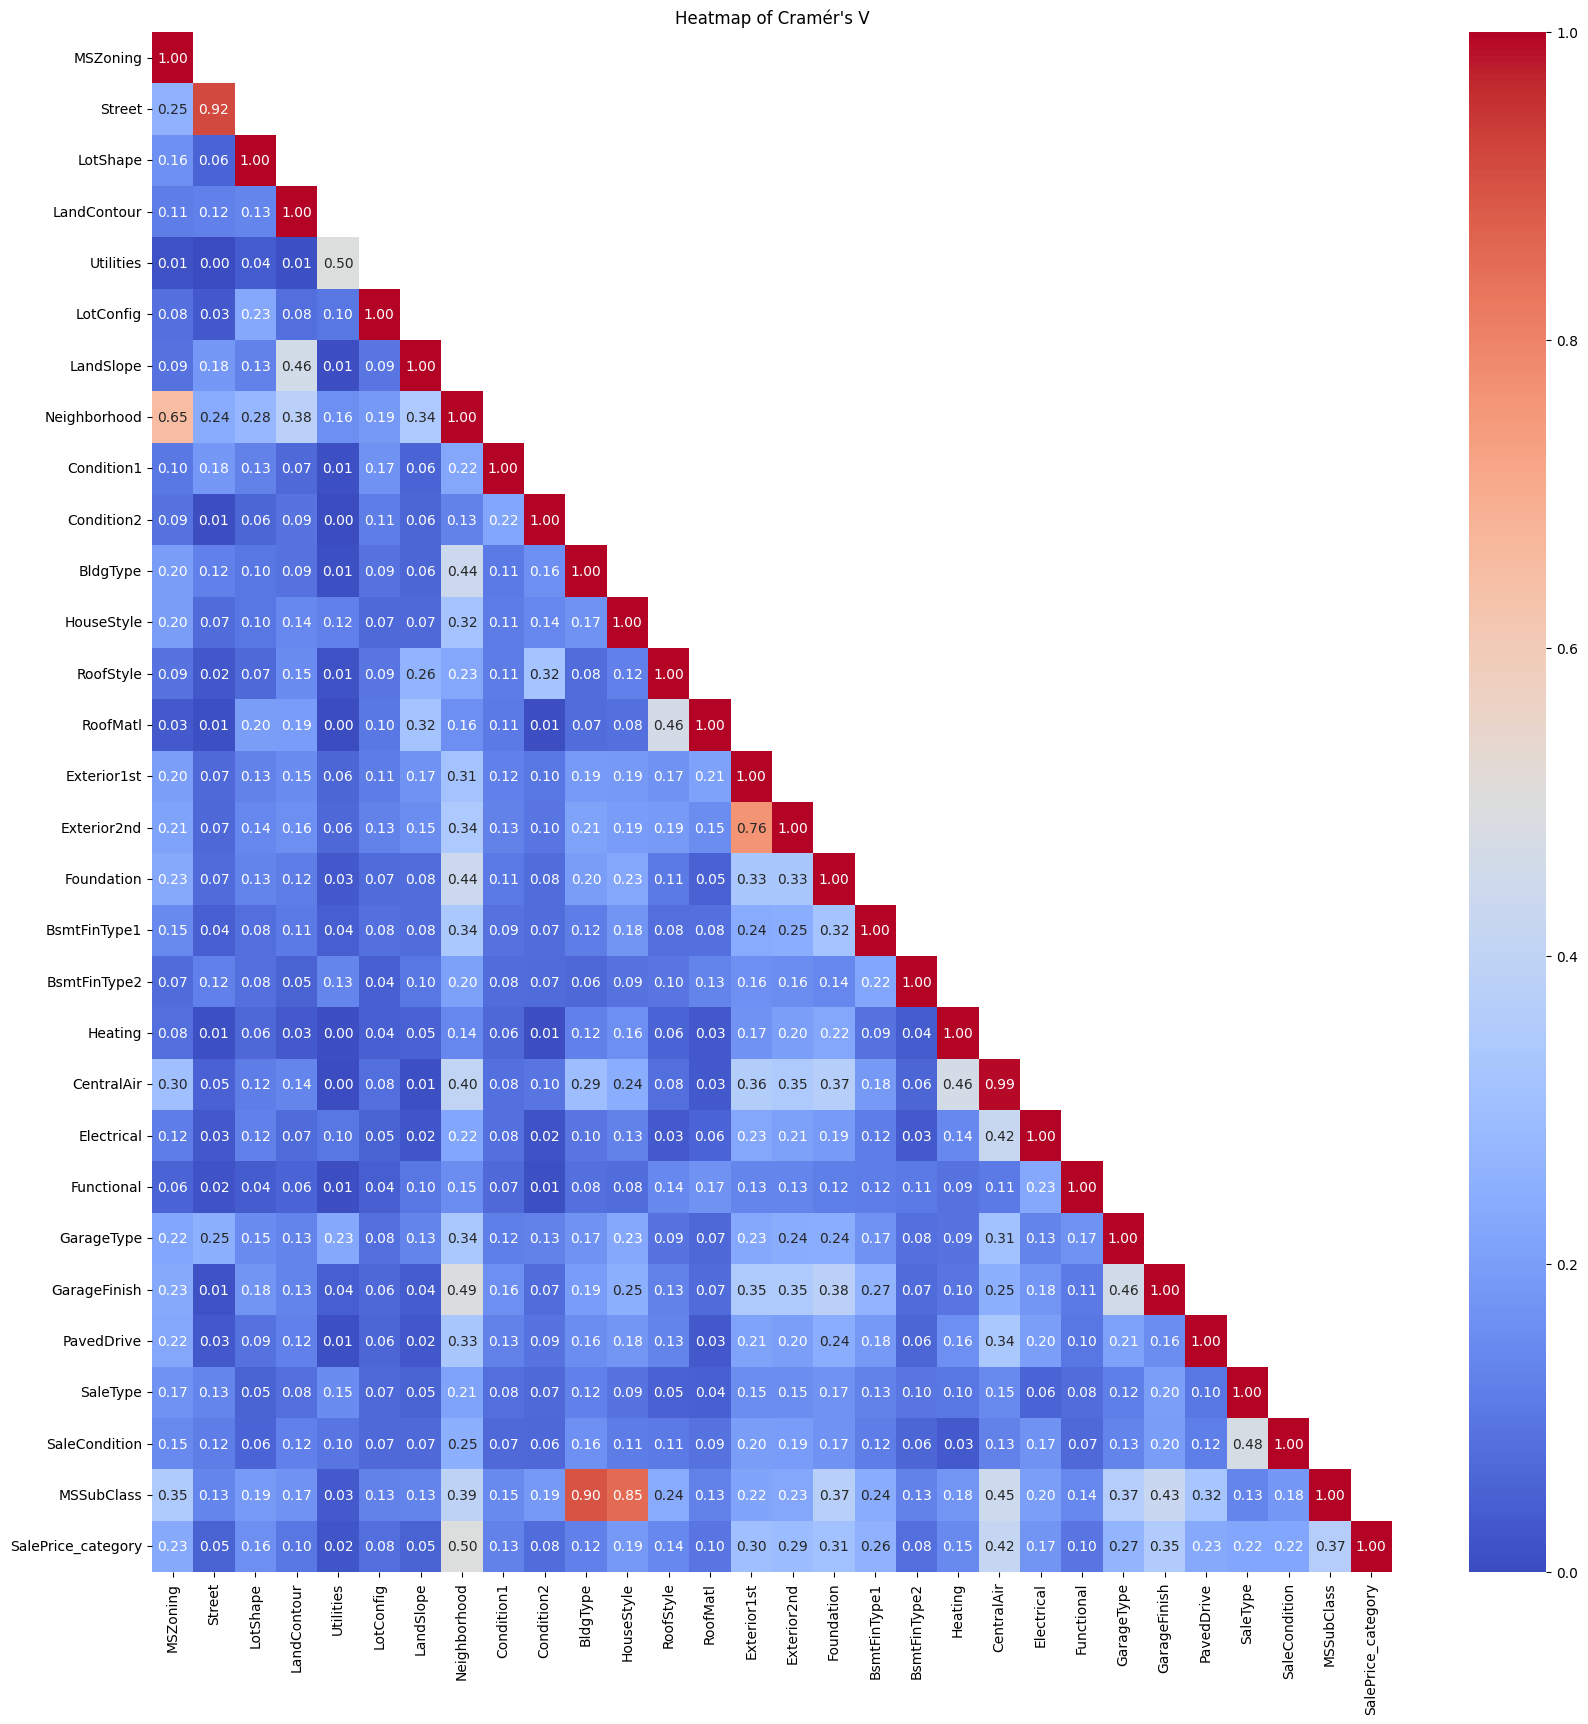

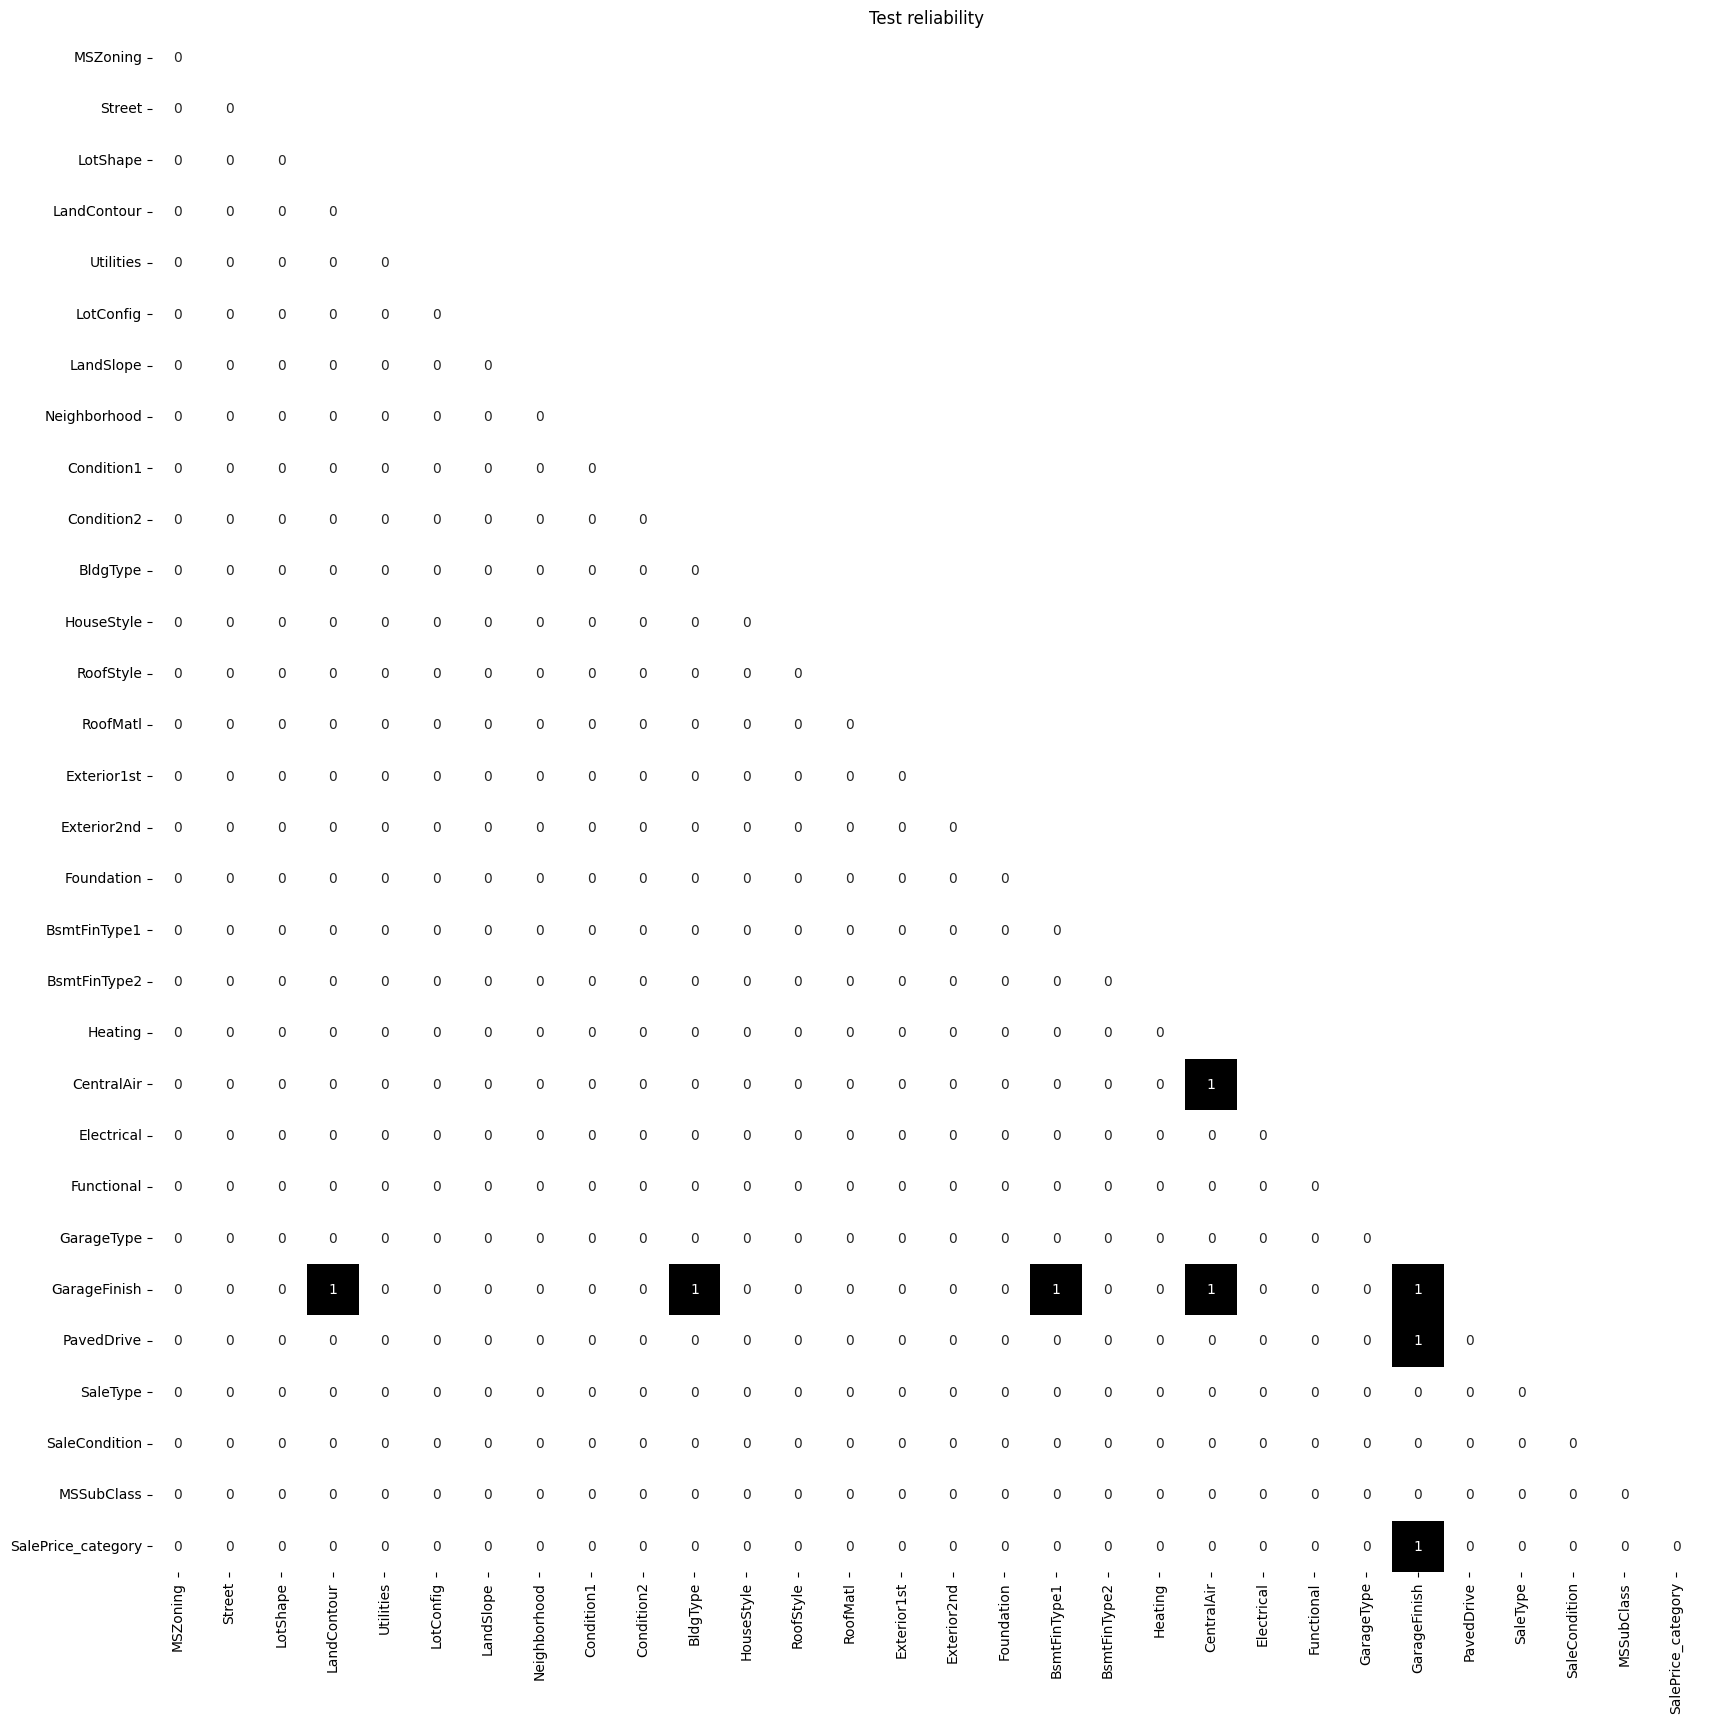

C:\Users\zyryanova.anastasiya\AppData\Local\Temp\ipykernel_20000\1632999572.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('coolwarm')


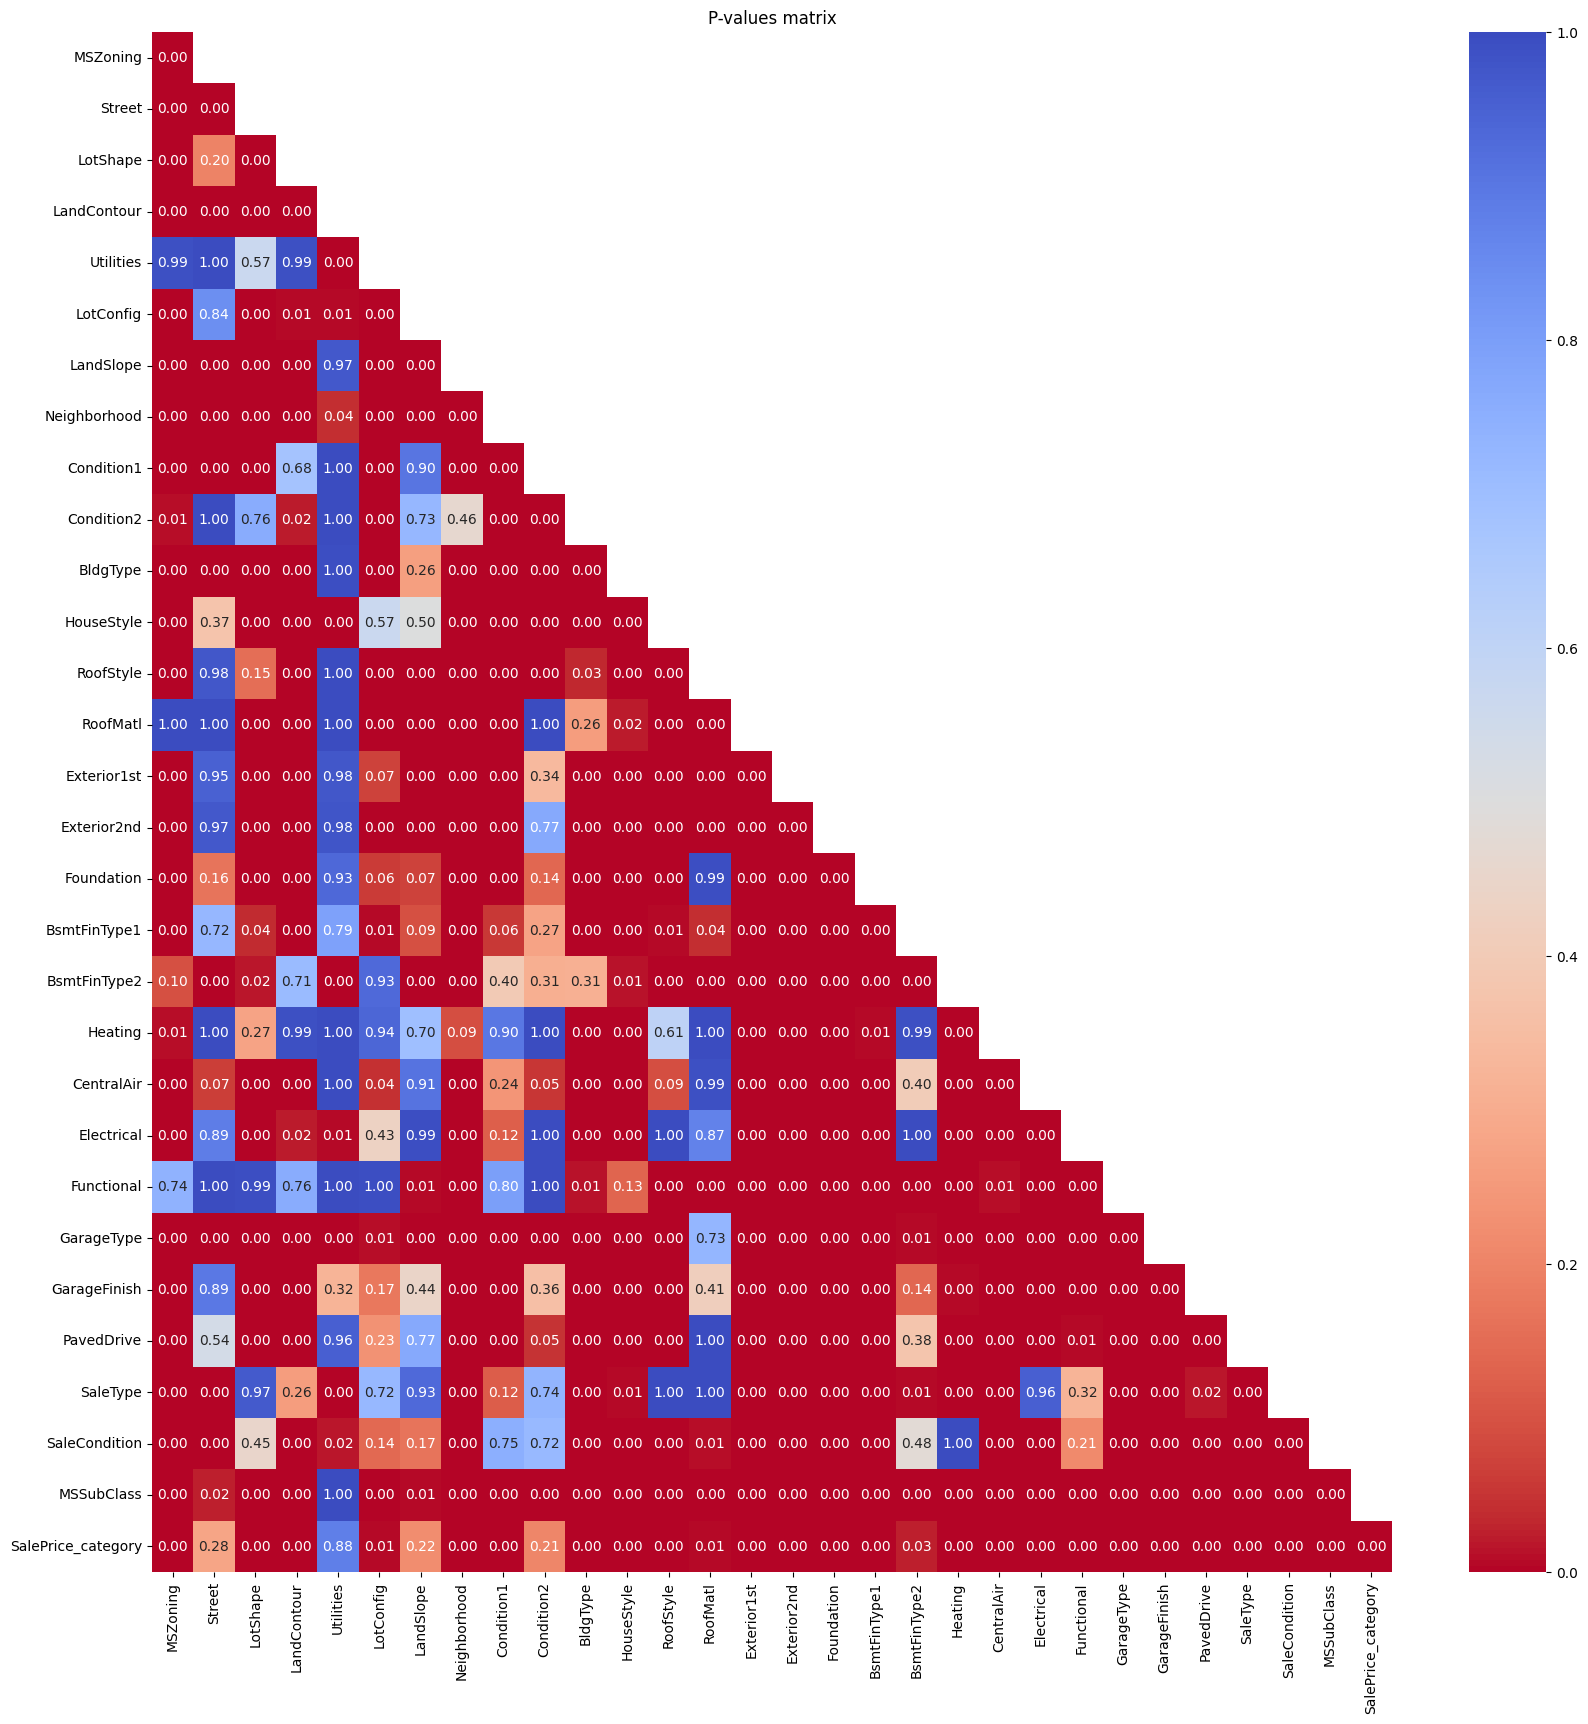

Reliable and significant pair: GarageFinish, LandContour
Reliable and significant pair: GarageFinish, BldgType
Reliable and significant pair: GarageFinish, BsmtFinType1
Reliable and significant pair: GarageFinish, CentralAir
Reliable and significant pair: PavedDrive, GarageFinish
Reliable and significant pair: SalePrice_category, GarageFinish


In [784]:
from scipy.stats import chi2_contingency

# Функция для расчета ассоциации Крамера
def cramers_v(contingency_table):
    chi2_stat, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Функция для выполнения хи-квадрат теста для всех пар категориальных переменных
def chi2_test(df, min_expected_freq=5):
    categories = df.columns
    p_matrix = pd.DataFrame(index=categories, columns=categories)
    cramers_v_matrix = pd.DataFrame(index=categories, columns=categories)
    reliability_matrix = pd.DataFrame(index=categories, columns=categories)

    
    for i in range(len(categories)):
        for j in range(i, len(categories)):
            # Создание таблицы сопряженности
            contingency_table = pd.crosstab(df[categories[i]], df[categories[j]])
            
            # Применение хи-квадрат теста
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            # Расчет Cramer's V
            cramers_v_value = cramers_v(contingency_table)
            
            # Проверка ожидаемых частот
            if (expected < min_expected_freq).any():
                reliability_matrix.loc[categories[i], categories[j]] = False
                reliability_matrix.loc[categories[j], categories[i]] = False
            else:
                reliability_matrix.loc[categories[i], categories[j]] = True
                reliability_matrix.loc[categories[j], categories[i]] = True


            # Сохранение p-значений и ассоциаций Крамера
            p_matrix.loc[categories[i], categories[j]] = p
            p_matrix.loc[categories[j], categories[i]] = p
            cramers_v_matrix.loc[categories[i], categories[j]] = cramers_v_value
            cramers_v_matrix.loc[categories[j], categories[i]] = cramers_v_value

             
    return p_matrix, cramers_v_matrix, reliability_matrix


# Выполнение теста
p_matrix, cramers_v_matrix, reliability_matrix= chi2_test(categorical)

# Построение тепловой карты для ассоциаций Крамера
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix.astype(float), mask=np.triu(np.ones_like(cramers_v_matrix), k =1), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Cramér\'s V')

plt.figure(figsize=(20, 20))
sns.heatmap(reliability_matrix.astype(int), mask=np.triu(np.ones_like(reliability_matrix, dtype=bool), k =1), cmap="binary", annot=True, cbar=False, fmt='d')
plt.title('Test reliability')
plt.show()

plt.figure(figsize=(20, 20))
orig_map=plt.cm.get_cmap('coolwarm') 

reversed_map = orig_map.reversed() 
sns.heatmap(p_matrix.astype(float), mask=np.triu(np.ones_like(p_matrix), k =1), cmap=reversed_map, annot=True, cbar=True, fmt='.2f')
plt.title('P-values matrix')
plt.show()

for i in range(len(p_matrix.columns)):
    for j in range(i):
        if p_matrix.iloc[i,j] < 0.05 and reliability_matrix.iloc[i,j]:
            print(f'Reliable and significant pair: {p_matrix.columns[i]}, {p_matrix.columns[j]}')

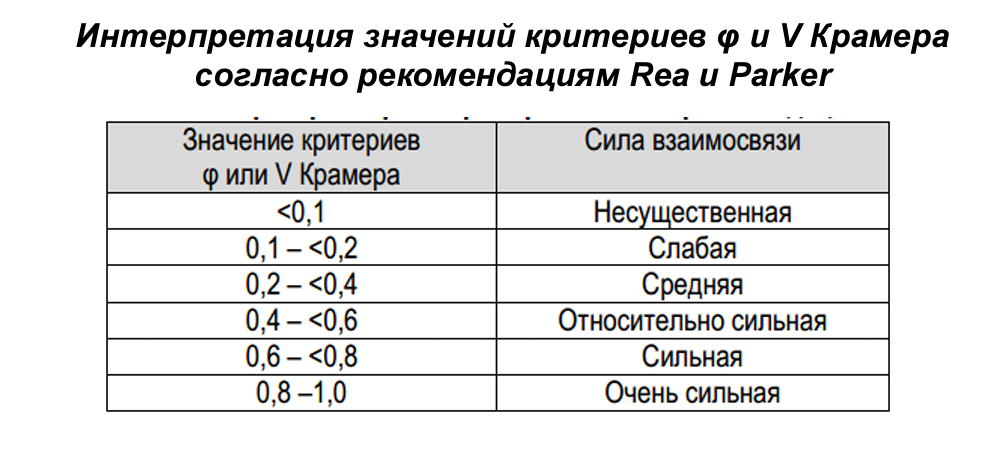

#### Взаимосвязь с целевой переменной

C:\Users\zyryanova.anastasiya\AppData\Local\Temp\ipykernel_20000\797466555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(target_correlations, palette="Spectral")


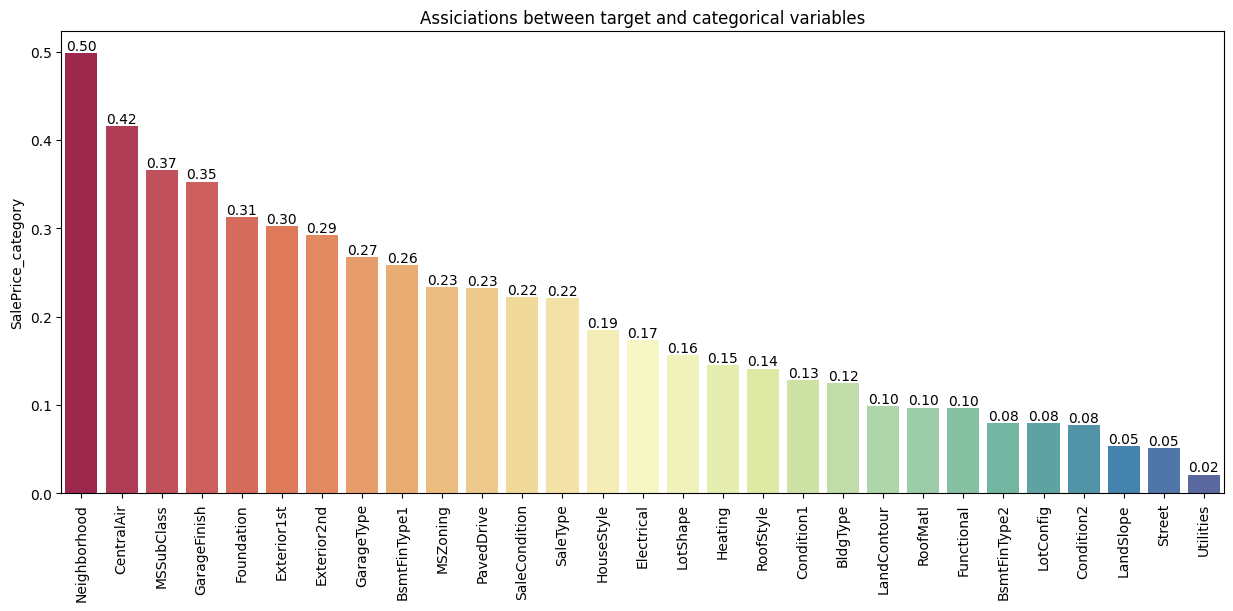

In [785]:
plt.figure(figsize=(15,6))
target_correlations = cramers_v_matrix.SalePrice_category.sort_values(ascending=False)
target_correlations = target_correlations.drop('SalePrice_category')
ax = sns.barplot(target_correlations, palette="Spectral")
plt.xticks(rotation=90)
plt.title('Assiciations between target and categorical variables')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

In [786]:
def determine_strength(value):
    if value < 0.1:
        return "Несущественная"
    elif 0.1 <= value < 0.2:
        return "Слабая"
    elif 0.2 <= value < 0.4:
        return "Средняя"
    elif 0.4 <= value < 0.6:
        return "Относительно сильная"
    elif 0.6 <= value < 0.8:
        return "Сильная"
    elif 0.8 <= value <= 1.0:
        return "Очень сильная"
    else:
        return "Не определено"

target_correlations = target_correlations.reset_index()
target_correlations.columns= ['Feature', 'Association']

target_correlations['Strength'] = target_correlations['Association'].apply(determine_strength)

# Группировка данных по силе ассоциации
grouped = target_correlations.groupby('Strength')['Feature'].apply(', '.join).reset_index()

In [787]:
grouped.style.set_properties( **{'white-space': 'nowrap', 'text-align': 'right'})


#### Выводы

1. Тест хи-квадрат выделяет большое число статистически занчимых зависимостей для пар категорий исходя из матрицы p-значений, многие значения в матрице меньше уровня значимости 0.05. С чем это может быть связано: тест хи-квадрат чувствителен к размеру выборки, с увеличением размера выборки даже слабые зависимости могут становиться статистически значимыми. Большая часть пар категорий исходя из теста имеют статистически значимые зависимости, но коэффициент ассоциации Крамера показывает, что у многих из них все же слабая ассоциация.

2. Тест хи-квадрат в большинстве случаев можно считать ненадежным исходя из матрицы надежности (нулевые значения). Почему в большинстве случаев тест считается ненадежным: для критерия хи-квадрат также существует проблема допустимого минимального значения в ячейке таблицы. То есть если это значение от 0 до 5 включительно, то использовать этот критерии некорректно. Если ожидаемые частоты слишком малы, тест может стать ненадежным. Низкие ожидаемые частоты можно объяснить наличием категорий с малым числом наблюдений, таблицы получаются слабонасыщенными, что объясняет ненадежность теста на большинстве пар признаков. Для анализа слабонасыщенных таблиц можно применить точный метод Фишера, однако он предназначн для небольших выборок, в данном случае не удастся его применить. Предлагается дополнительно расссмотреть таблицы сопряженности для признаков с сильной ассоциацией.


Есть относитеьно сильная ассоциация между признаками:
- MSZoning и Neiborhood
- Exterior1st Exterior2nd

Очень сильная:
- MSSubClass и HouseStyle
- MSSubClass и BldgType

Выявлены признаки, ассоциированные с целевой перемнной. В дальнейшем анализе будут рассмотрены признаки имеющие с ней относительно сильную и среднюю ассоциацию.
 




Проверим последнее предположение относительно редких категорий.

In [788]:
categorical['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [789]:
categorical['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [790]:
categorical['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

Действительно в признаках присутсвуют редкие категории

Между признаками Neighborhood и MSZoning может быть пространственная корреляция.
В разных районах (Neighborhood) города может преобладать тот или иной тип зонирования (MSZoning).
Например, в исторических районах (OldTown) часто встречается зонирование RM (зоны с средней плотностью жилого строительства), так как такие районы могли быть застроены многоквартирными домами и низкоэтажной застройкой в разное время. Здесь может быть высокая плотность населения, но с ограничениями по высоте зданий, чтобы сохранить исторический облик

В пригородных районах, таких как NridgHt или StoneBr, может преобладать зонирование RL (Residential Low Density).



In [791]:
pd.crosstab(categorical.MSZoning , categorical.Neighborhood)

Neighborhood  Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  \
MSZoning                                                                     
C (all)             0        0       0        0        0        0        0   
FV                  0        0       0        0        0        0        0   
RH                  0        0       0        0        0        0        2   
RL                 16        0       0       28       28      140       46   
RM                  1        2      16       30        0       10        3   

Neighborhood  Edwards  Gilbert  IDOTRR  ...  NoRidge  NridgHt  OldTown  SWISU  \
MSZoning                                ...                                     
C (all)             0        0       9  ...        0        0        1      0   
FV                  0        0       0  ...        0        0        0      0   
RH                  2        0       0  ...        0        0        0      5   
RL                 90       79       0  ...       41       76       17     20   
RM                  8        0      28  ...        0        1       95      0   

Neighborhood  Sawyer  SawyerW  Somerst  StoneBr  Timber  Veenker  
MSZoning                                                          
C (all)            0        0        0        0       0        0  
FV                 0        0       65        0       0        0  
RH                 0        5        0        0       0        0  
RL                72       54       21       25      38       11  
RM                 2        0        0        0       0        0  

[5 rows x 25 columns]

Таблица сопряженности для признаков Exterior1st и Exterior2nd показывает, что значения этих признаков часто совпадают: в большом количестве случаев тип основной и дополнительной внешней отделки дома одинаковый. 
Влияние на целевую перемнную практически одинаковое, можно оставить один из признаков, например Exterior1st.

In [792]:
pd.crosstab(categorical.Exterior2nd , categorical.Exterior1st)

Exterior1st  AsbShng  AsphShn  BrkComm  BrkFace  CBlock  CemntBd  HdBoard  \
Exterior2nd                                                                 
AsbShng           17        0        0        1       0        0        0   
AsphShn            0        1        0        0       0        0        1   
Brk Cmn            0        0        2        0       0        0        0   
BrkFace            0        0        0       24       0        0        0   
CBlock             0        0        0        0       1        0        0   
CmentBd            0        0        0        0       0       59        0   
HdBoard            0        0        0        3       0        0      193   
ImStucc            0        0        0        0       0        0        2   
MetalSd            0        0        0        0       0        0        1   
Other              0        0        0        0       0        0        0   
Plywood            2        0        0        6       0        0       23   
Stone              0        0        0        2       0        0        0   
Stucco             1        0        0        1       0        0        0   
VinylSd            0        0        0        0       0        0        0   
Wd Sdng            0        0        0       12       0        1        1   
Wd Shng            0        0        0        1       0        1        1   

Exterior1st  ImStucc  MetalSd  Plywood  Stone  Stucco  VinylSd  Wd Sdng  \
Exterior2nd                                                               
AsbShng            0        0        0      0       0        1        1   
AsphShn            0        1        0      0       0        0        0   
Brk Cmn            0        0        5      0       0        0        0   
BrkFace            0        0        0      0       0        0        1   
CBlock             0        0        0      0       0        0        0   
CmentBd            0        0        0      0       1        0        0   
HdBoard            0        3        2      1       0        1        2   
ImStucc            1        0        3      0       0        1        3   
MetalSd            0      212        0      0       0        0        1   
Other              0        0        0      0       0        1        0   
Plywood            0        0       96      0       0        2        8   
Stone              0        0        0      1       1        0        1   
Stucco             0        1        0      0      20        1        1   
VinylSd            0        0        0      0       0      502        2   
Wd Sdng            0        2        2      0       0        1      177   
Wd Shng            0        1        0      0       3        5        9   

Exterior1st  WdShing  
Exterior2nd           
AsbShng            0  
AsphShn            0  
Brk Cmn            0  
BrkFace            0  
CBlock             0  
CmentBd            0  
HdBoard            2  
ImStucc            0  
MetalSd            0  
Other              0  
Plywood            5  
Stone              0  
Stucco             1  
VinylSd            0  
Wd Sdng            1  
Wd Shng           17

Переменные MSSubClass, HouseStyle и BldgType описывают различные аспекты типа, стиля и конструкции жилых зданий. 

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
       
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSSubClass (тип недвижимости) описывает тип жилья с точки зрения его конструкции и возраста. Например, коды 20, 30 и 120 обозначают одноэтажные дома, но с разными характеристиками и возрастом. Это переменная, которая классифицирует дома на более общем уровне, включая одно- и двухэтажные дома, дуплексы, таунхаусы и так далее.


HouseStyle (стиль дома) описывает архитектурный стиль дома, фокусируясь на количестве этажей и особенностях конструкции. Например, 1Story, 2Story, SFoyer и SLvl обозначают различные архитектурные стили, которые могут соответствовать одному и тому же типу недвижимости, указанному в MSSubClass.

BldgType (тип здания) описывает тип жилого строения с точки зрения его назначения и конфигурации, например, одно- или двухквартирный дом, таунхаус или дуплекс.

Примеры связей между переменными:
- 1-этажные дома (MSSubClass 20, 30, 120) обычно будут иметь стиль 1Story в переменной HouseStyle, и могут быть 1Fam в BldgType.
- Дома с двумя этажами (MSSubClass 60, 70, 160) будут иметь стиль 2Story или 2.5Story в HouseStyle и могут быть 1Fam в BldgType.
- Дуплексы (MSSubClass 90) будут иметь тип Duplx в BldgType, а в HouseStyle могут быть различные варианты, такие как 1Story или 2Story.
- Конверсии из одного семейного дома в двухквартирный (MSSubClass 190) могут иметь 2FmCon в BldgType и различные стили в HouseStyle.

Таким образом, MSSubClass можно рассматривать как более общий признак, который связан с более специфичными характеристиками здания, описанными в HouseStyle и BldgType. Он может частично или полностью покрывать информацию, содержащуюся в HouseStyle и BldgType, поэтому эти признаки можно удалить.

In [793]:
pd.crosstab(categorical.MSSubClass , categorical.HouseStyle)

HouseStyle  1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
MSSubClass                                                              
20               0       0     534       0       0       1       0     1
30               1       1      67       0       0       0       0     0
40               0       0       4       0       0       0       0     0
45               0      12       0       0       0       0       0     0
50             141       0       0       0       0       3       0     0
60               0       0       0       0       0     298       0     1
70               0       0       0       1       0      59       0     0
75               0       0       0       6       9       1       0     0
80               0       0       0       0       0       0       0    58
85               0       0       0       0       0       0      20     0
90               4       0      29       0       0       9       9     1
120              0       0      86       0       0       0       1     0
160              0       0       0       0       0      63       0     0
180              0       0       0       0       0       0       7     3
190              8       1       6       1       2      11       0     1

In [794]:
pd.crosstab(categorical.MSSubClass , categorical.BldgType)

BldgType    1Fam  2fmCon  Duplex  Twnhs  TwnhsE
MSSubClass                                     
20           535       1       0      0       0
30            69       0       0      0       0
40             4       0       0      0       0
45            12       0       0      0       0
50           144       0       0      0       0
60           299       0       0      0       0
70            60       0       0      0       0
75            16       0       0      0       0
80            58       0       0      0       0
85            20       0       0      0       0
90             0       0      52      0       0
120            3       0       0      5      79
160            0       0       0     33      30
180            0       0       0      5       5
190            0      30       0      0       0

Посмотрим на частоту каждой категории в признаках

In [795]:
for column in categorical.columns:
    print(categorical[column].value_counts(normalize=True), end='\n\n')

MSZoning
RL        0.79
RM        0.15
FV        0.04
RH        0.01
C (all)   0.01
Name: proportion, dtype: float64

Street
Pave   1.00
Grvl   0.00
Name: proportion, dtype: float64

LotShape
Reg   0.63
IR1   0.33
IR2   0.03
IR3   0.01
Name: proportion, dtype: float64

LandContour
Lvl   0.90
Bnk   0.04
HLS   0.03
Low   0.02
Name: proportion, dtype: float64

Utilities
AllPub   1.00
NoSeWa   0.00
Name: proportion, dtype: float64

LotConfig
Inside    0.72
Corner    0.18
CulDSac   0.06
FR2       0.03
FR3       0.00
Name: proportion, dtype: float64

LandSlope
Gtl   0.95
Mod   0.04
Sev   0.01
Name: proportion, dtype: float64

Neighborhood
NAmes     0.15
CollgCr   0.10
OldTown   0.08
Edwards   0.07
Somerst   0.06
Gilbert   0.05
NridgHt   0.05
Sawyer    0.05
NWAmes    0.05
SawyerW   0.04
BrkSide   0.04
Crawfor   0.03
Mitchel   0.03
NoRidge   0.03
Timber    0.03
IDOTRR    0.03
ClearCr   0.02
StoneBr   0.02
SWISU     0.02
MeadowV   0.01
Blmngtn   0.01
BrDale    0.01
Veenker   0.01
NPkVill   0.01

Неинформативные параметры:
- Street
- Utilities
- Condition2
- RoofMatl
- Heating

Почти всегда одинаквое значение

#### Распределение категорий цены для категориальных признаков

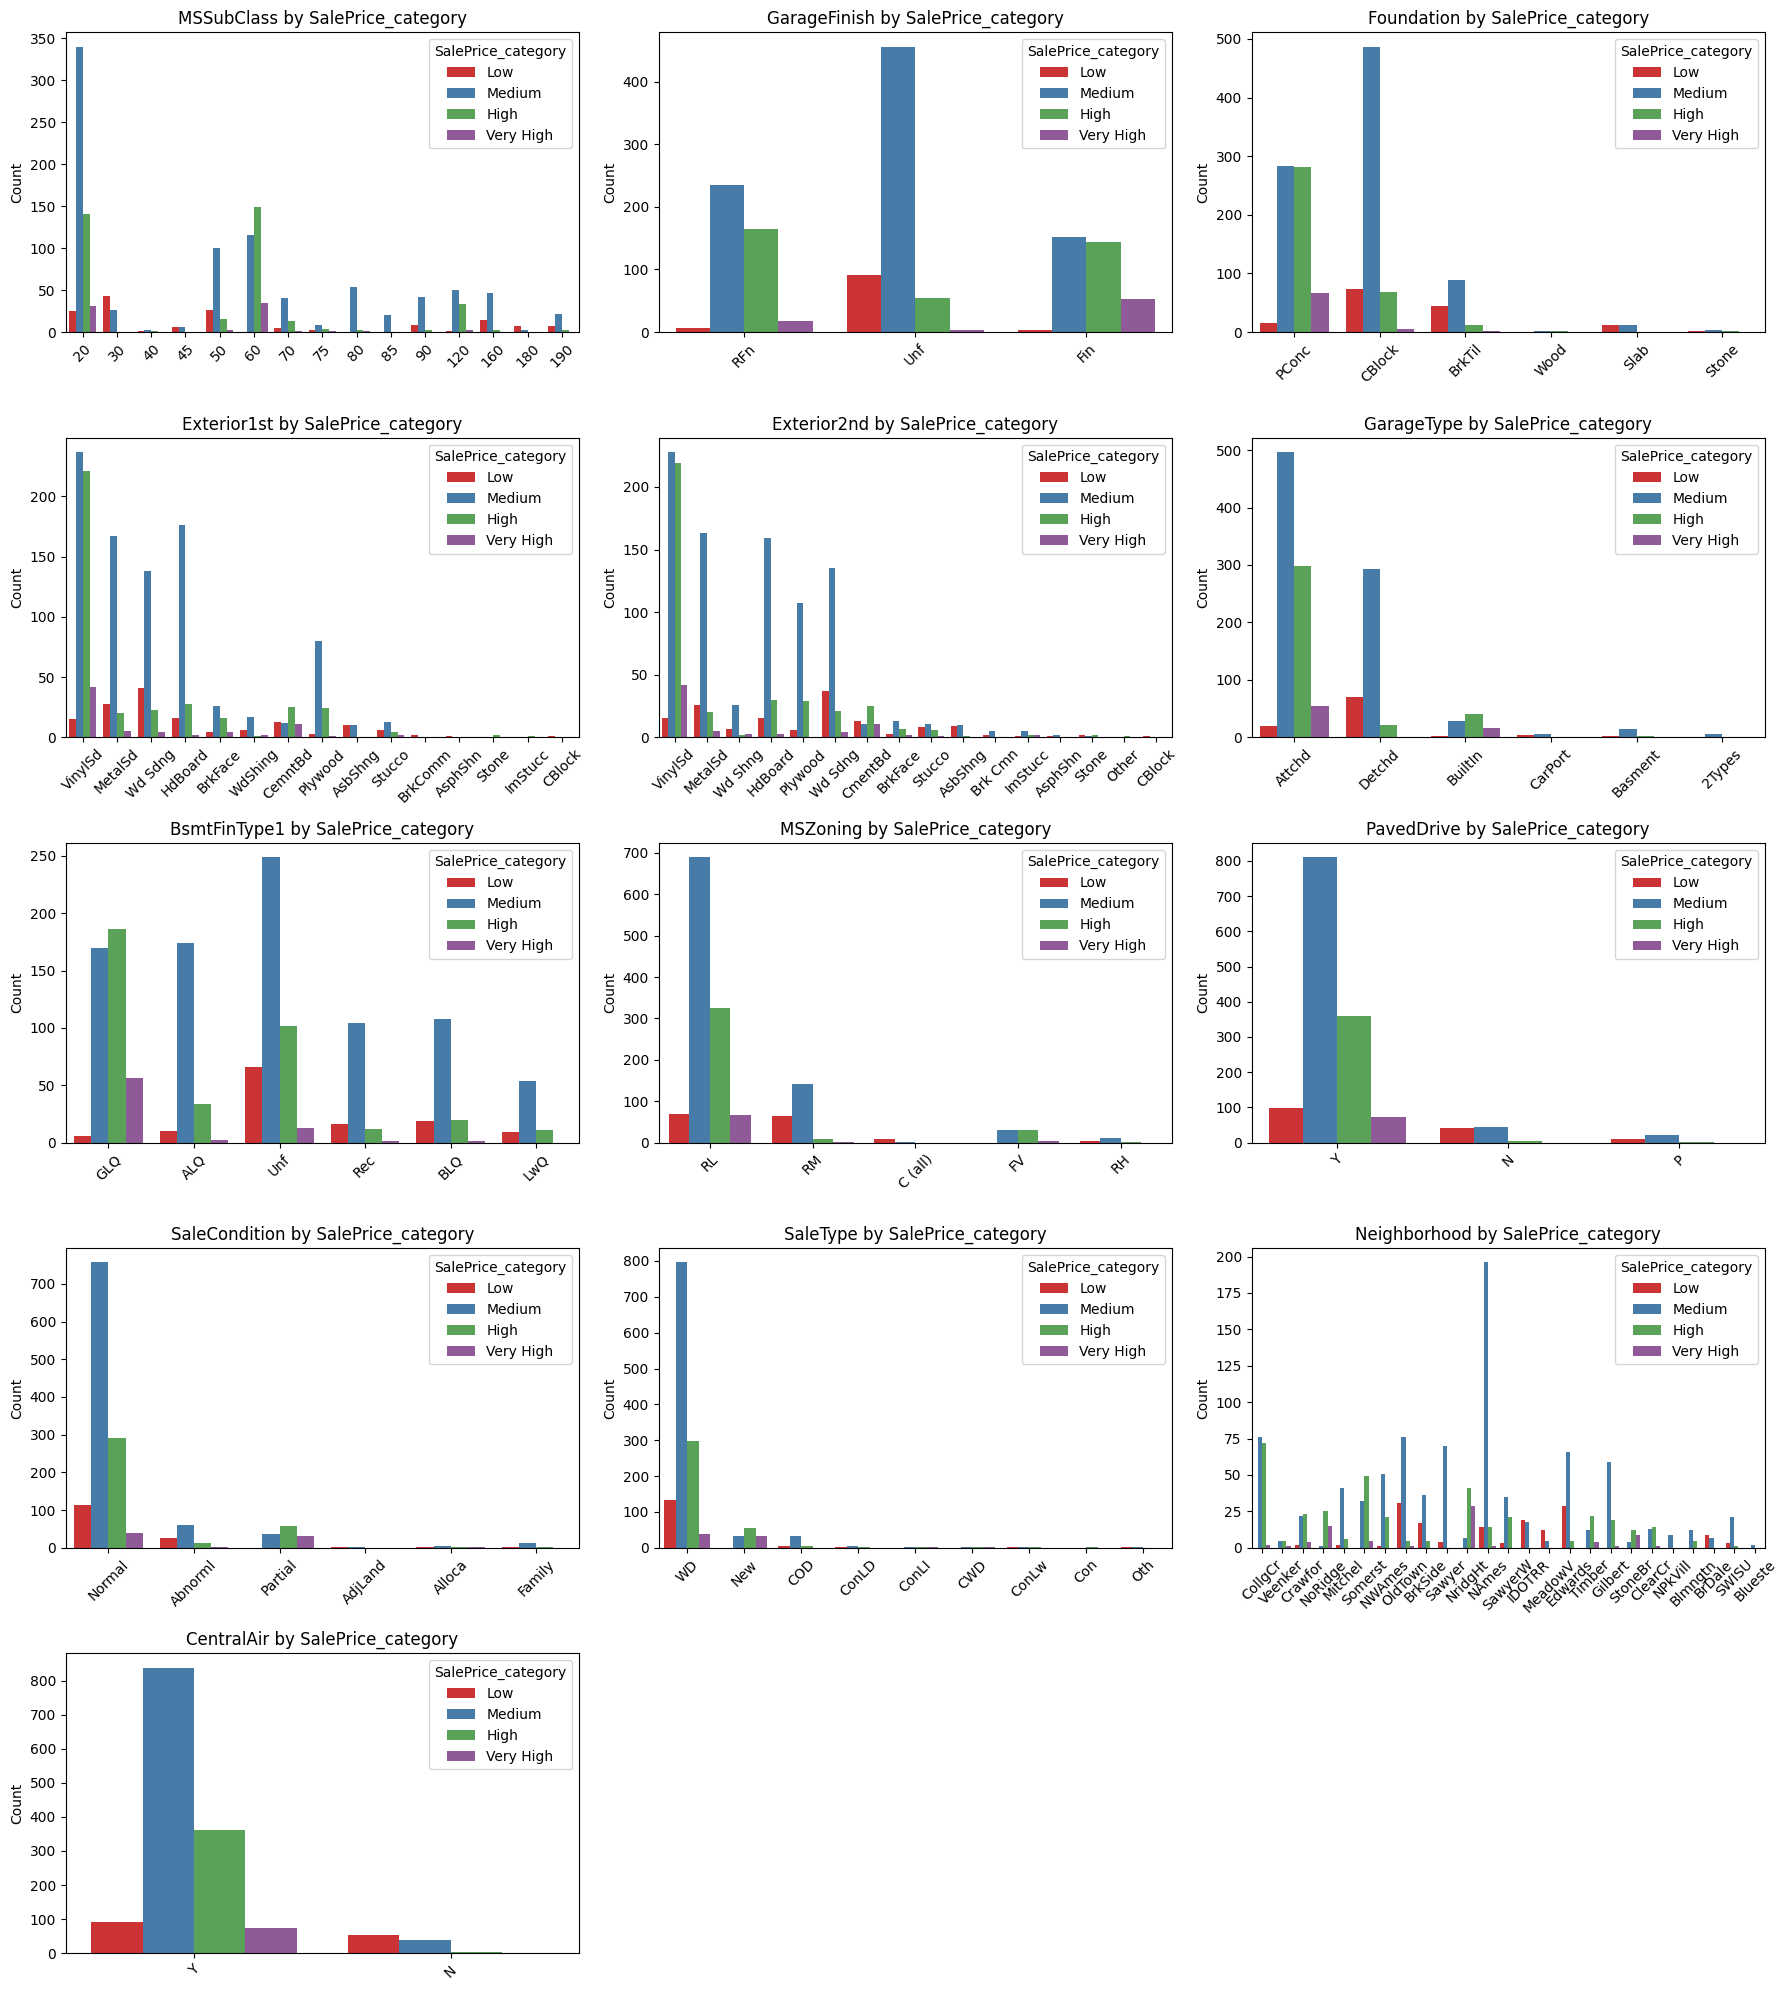

In [796]:
# Список категориальных переменных
association_vars = [
    'MSSubClass', 'GarageFinish', 'Foundation', 'Exterior1st', 'Exterior2nd',
    'GarageType', 'BsmtFinType1', 'MSZoning', 'PavedDrive', 'SaleCondition',
    'SaleType', 'Neighborhood', 'CentralAir'
]


num_vars = len(association_vars)
num_cols = 3  # Число колонок в сетке субплотов
num_rows = (num_vars + num_cols - 1) // num_cols  # Количество строк

plt.figure(figsize=(18, 4 * num_rows)) 


for i, var in enumerate(association_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=categorical, x=var, hue='SalePrice_category', palette='Set1')
    plt.title(f'{var} by SalePrice_category')
    plt.xticks(rotation=45)  
    plt.xlabel('')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

#### Среднее значение цены для категориальных признаков

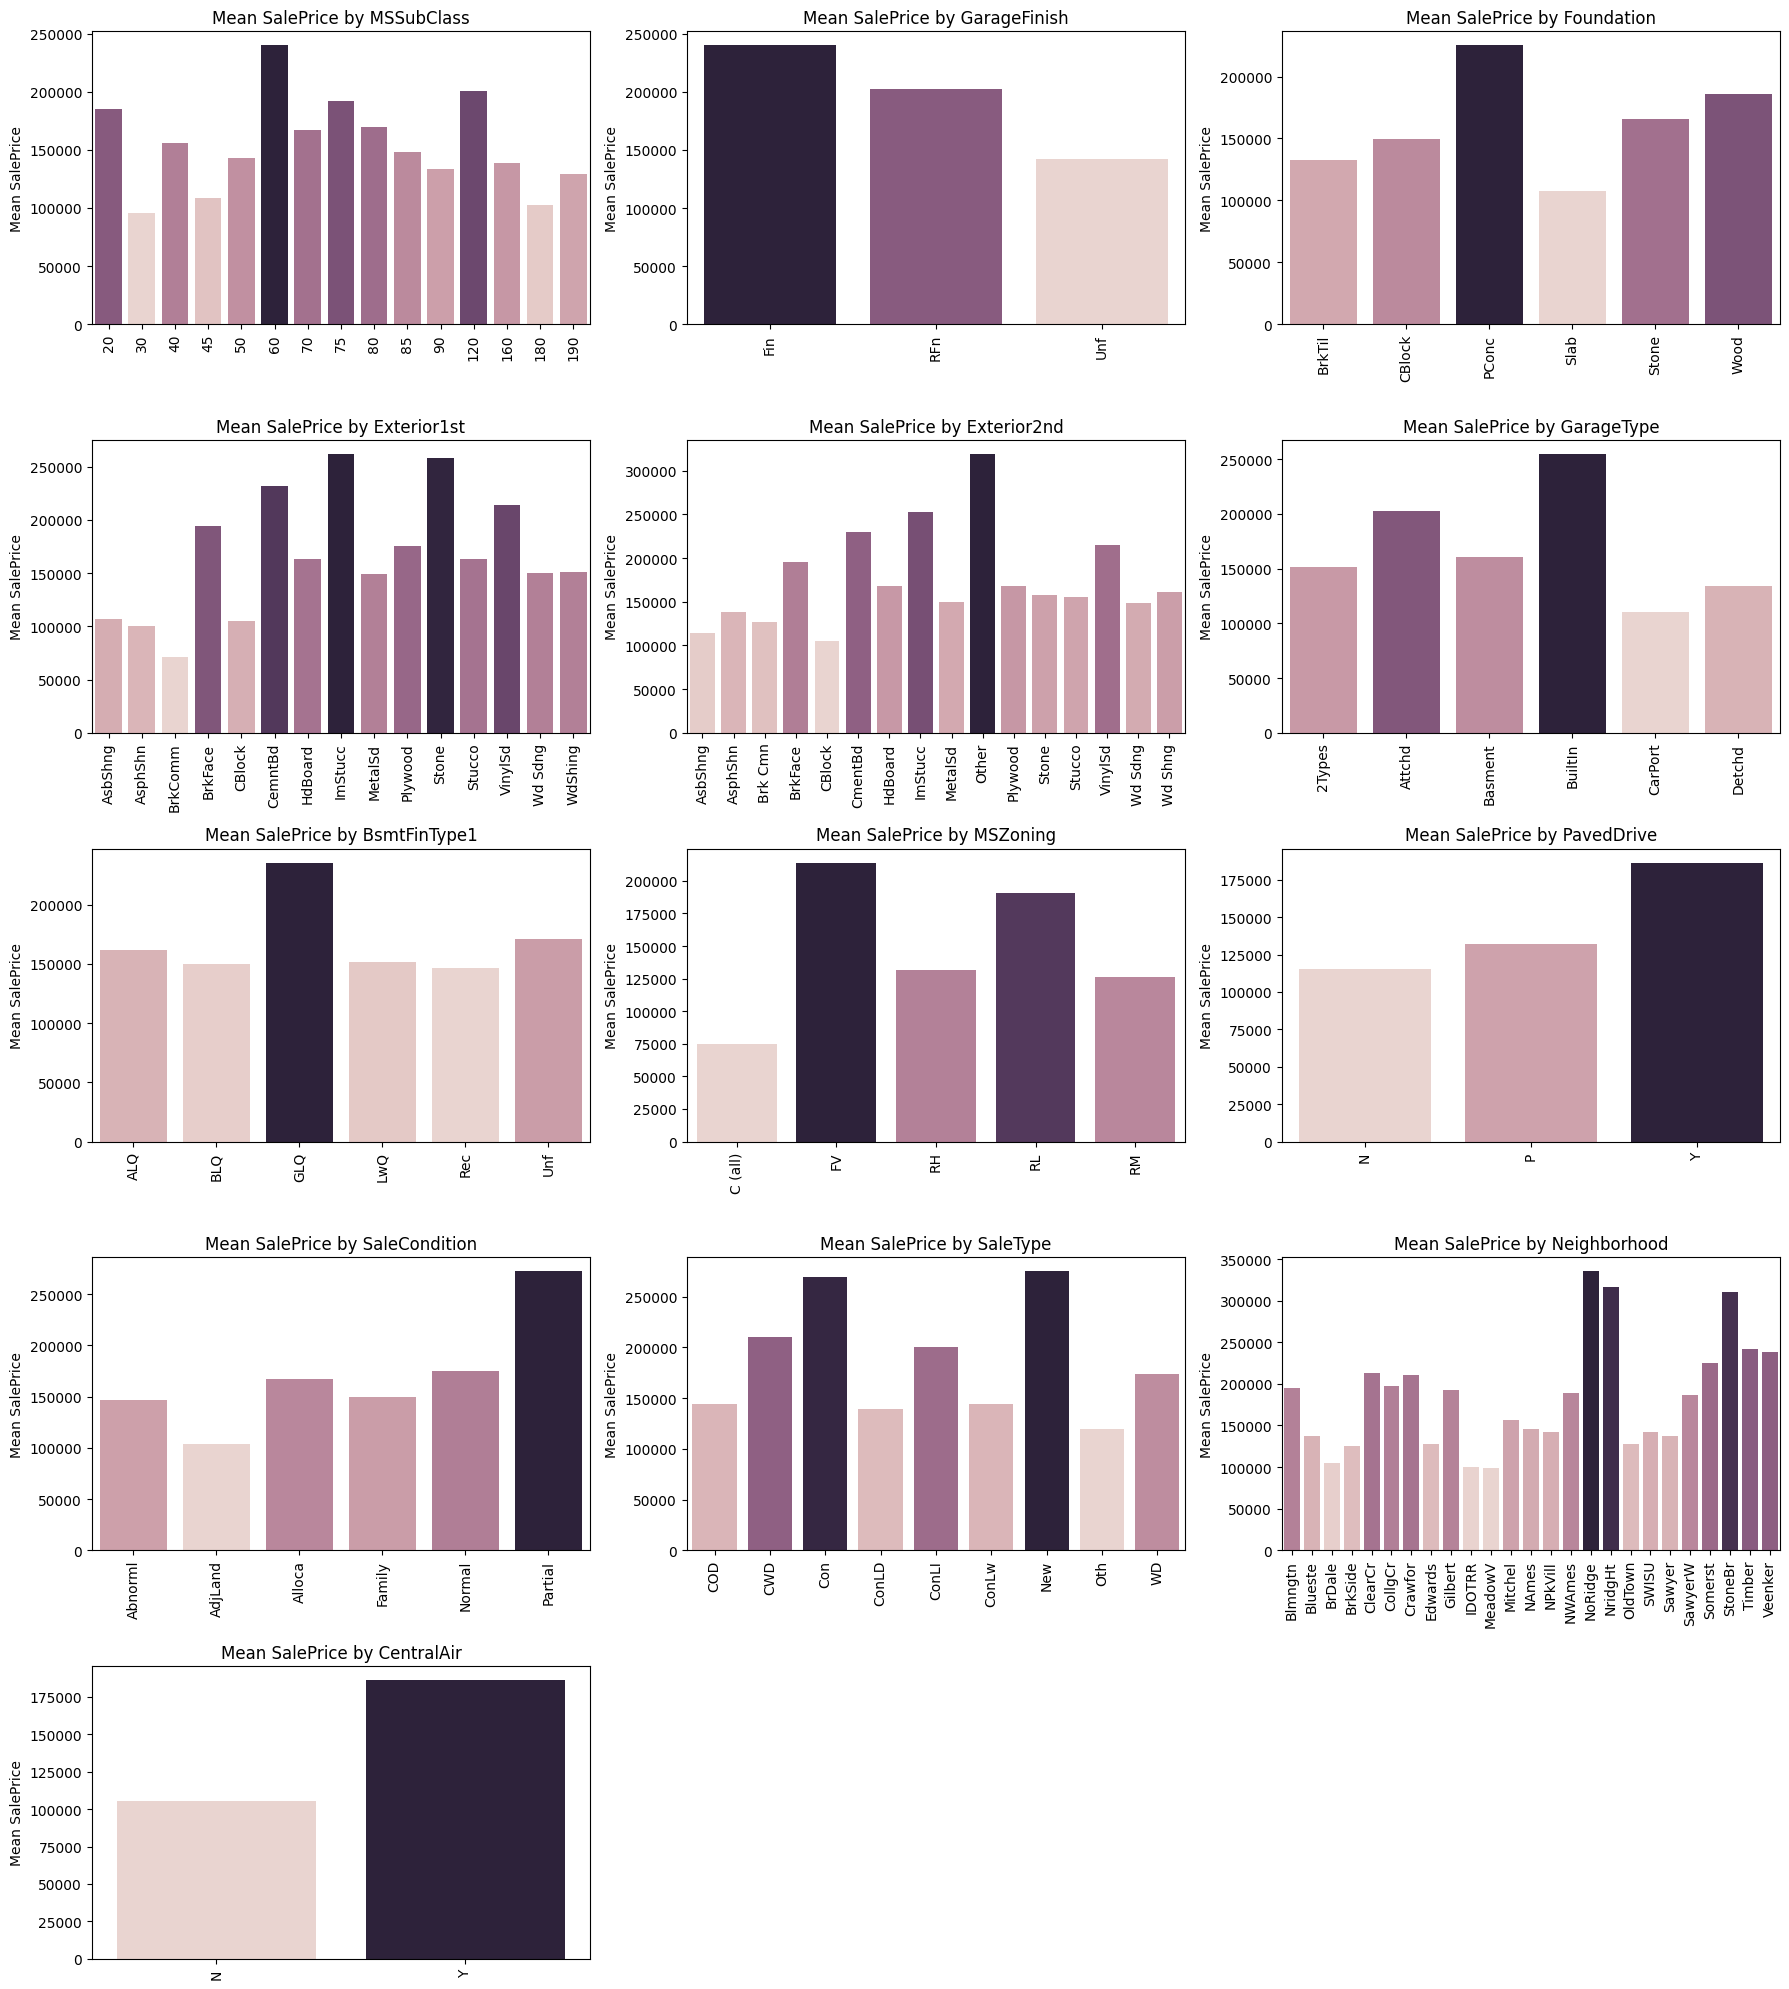

In [797]:
plt.figure(figsize=(18, 4 * num_rows))  # Размер фигуры

# Для каждого категориального признака строим график средней цены
for i, var in enumerate(association_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    # Рассчитываем среднюю цену продажи для каждой категории
    avg_price = train_df.groupby(var)['SalePrice'].mean().reset_index()
    # Создаем график
    sns.barplot(data=avg_price, x=var, y='SalePrice', hue=avg_price['SalePrice'], legend=None)
    plt.title(f'Mean SalePrice by {var}')
    plt.xticks(rotation=90)  # Поворот меток оси x для лучшей читаемости
    plt.xlabel('')
    plt.ylabel('Mean SalePrice')

plt.tight_layout()  # Уменьшение межплотного расстояния
plt.show()

In [798]:
columns_to_drop = ['Street','Utilities','Condition2', 'RoofMatl', 'Heating', 'HouseStyle', 'BldgType', 'Exterior2nd']
train_df=train_df.drop(columns=columns_to_drop)
test_df=test_df.drop(columns=columns_to_drop)

In [799]:
train_df['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

## Выбросы

### Визуализация выбросов

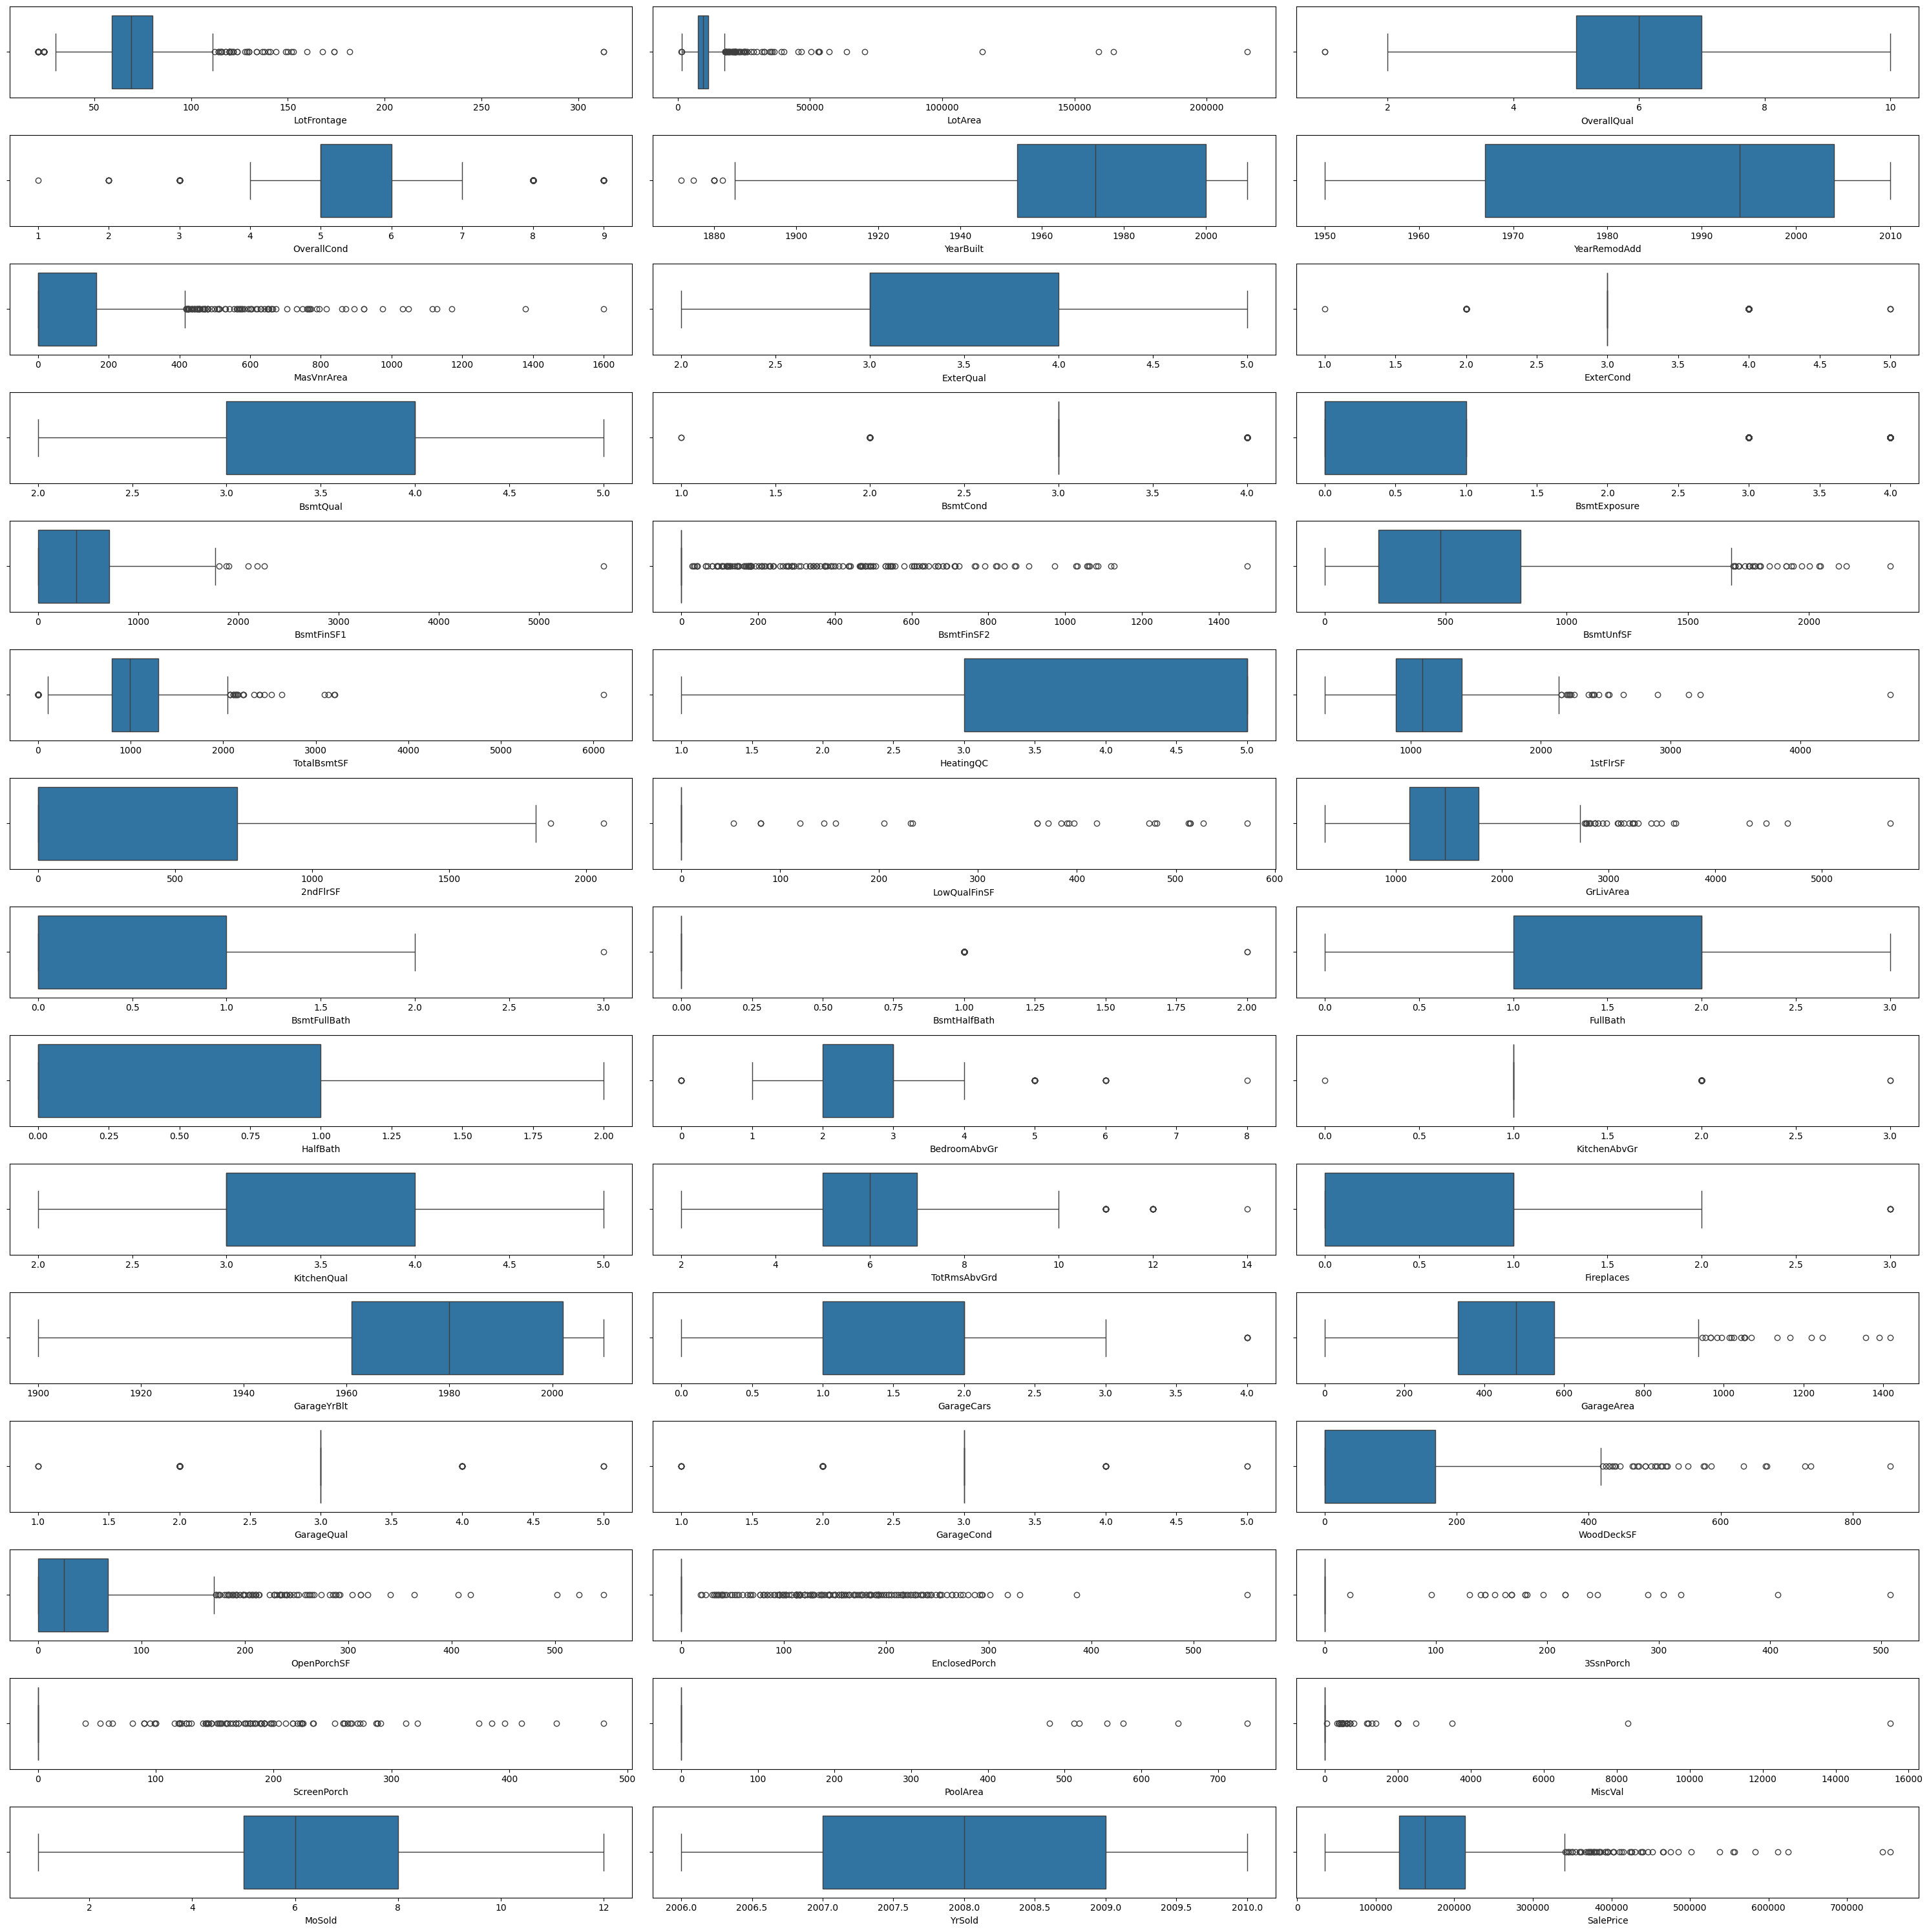

In [800]:
plt.figure(figsize=(30, 30))  # Размер фигуры для лучшего отображения

for i, feat in enumerate(num_features.columns):
    plt.subplot((len(num_features.columns) + 2) // 3, 3, i + 1)  # Создайте подграфик для каждого признака
    sns.boxplot(x=num_features[feat])

plt.tight_layout()  # Для автоматической подгонки графиков
plt.show()

In [801]:
train_df['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

### Зависимости с целевой переменной

Визуализируем зависимость целевой перемнной от признакв.
На графиках также отмечены выбросы целевой перемнной и добавлены линии, обозначающие границы усов диаграммы размаха (нулевой и четверный квартили) для признаков, чтобы отслеживать выбросы по признаку

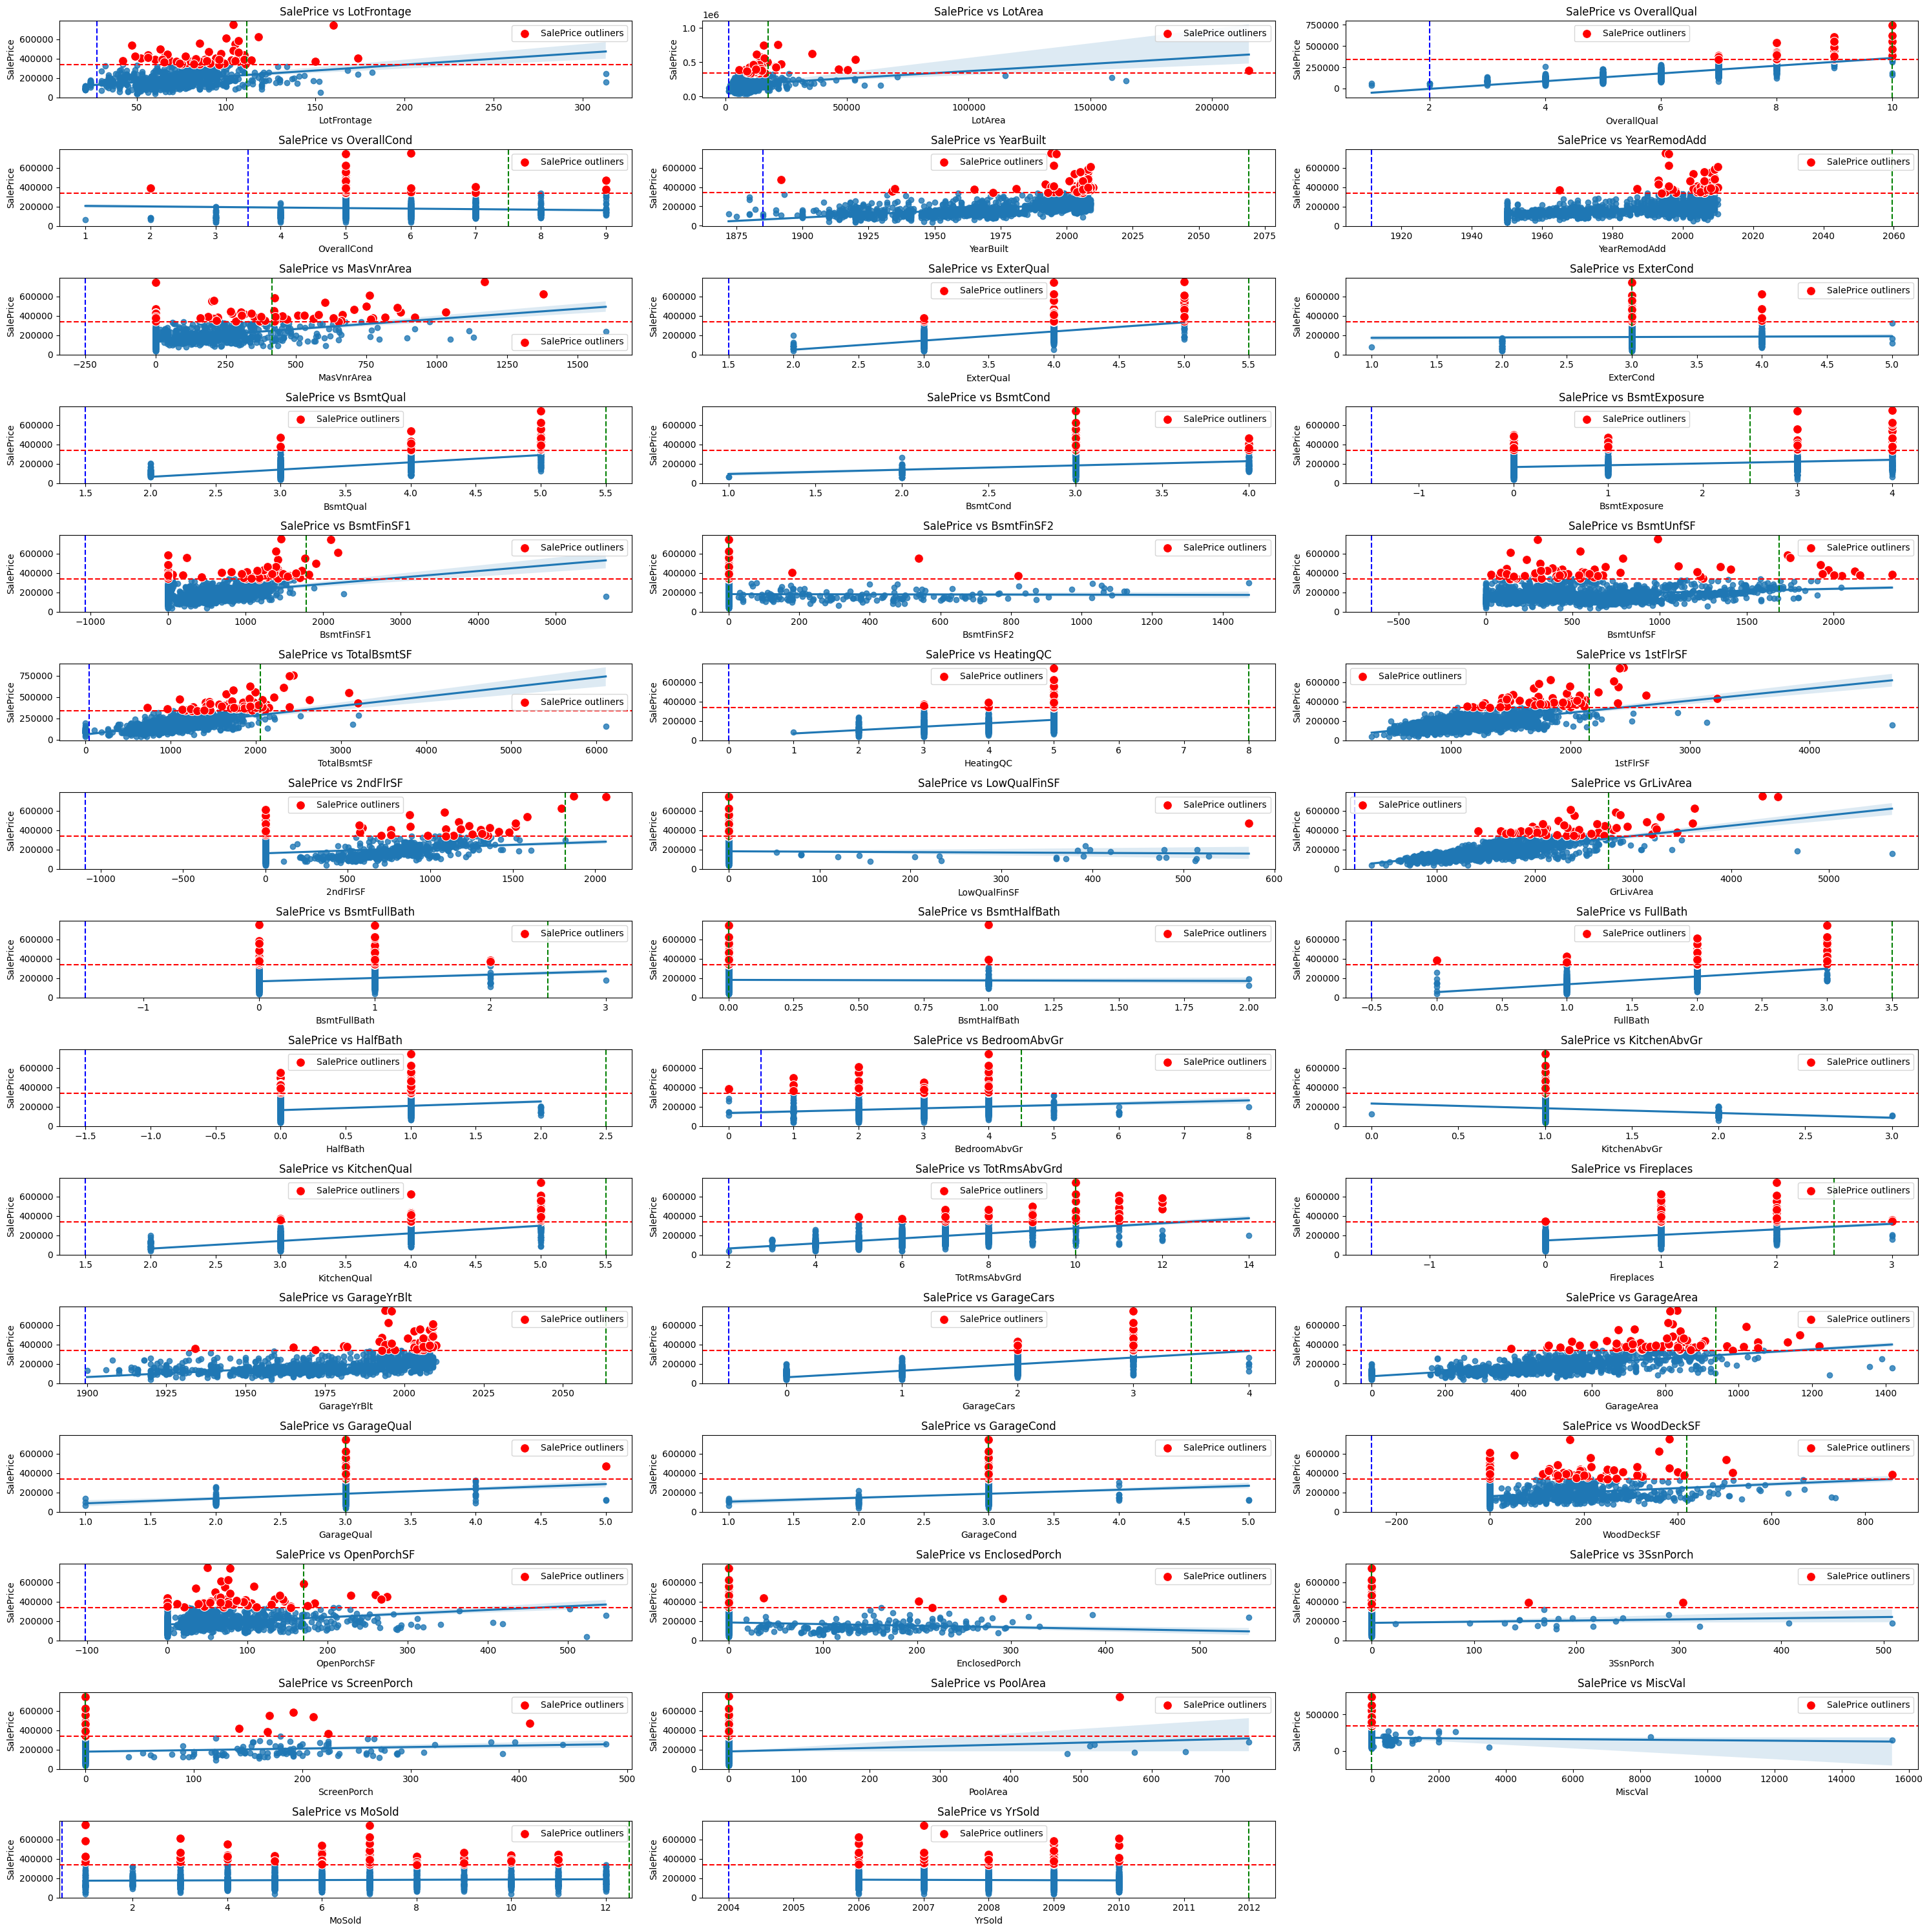

In [802]:
num_features_no_target = num_features.columns[num_features.columns != 'SalePrice']  # Все столбцы, кроме 'SalePrice'
y_value = 340000

plt.figure(figsize=(30, 30))

for i, feature in enumerate(num_features_no_target):
    plt.subplot(len(num_features_no_target) // 3 + 1, 3, i + 1)  # Создайте подграфик для каждого признака
    
    
    sns.regplot(data=num_features, x=feature, y='SalePrice')

     # Выделите точки, где SalePrice больше threshold_value
    above_threshold = num_features[num_features['SalePrice'] > y_value]
    sns.scatterplot(data=above_threshold, x=feature, y='SalePrice', color='red', s=100, label=f'SalePrice outliners')

    # Используйте pandas для получения статистики по усам
    q1 = num_features[feature].quantile(0.25)
    q3 = num_features[feature].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr


    # Добавьте линии, обозначающие границы усов
    plt.axvline(x=lower_whisker, color='b', linestyle='--', label='Lower Whisker')
    plt.axvline(x=upper_whisker, color='g', linestyle='--', label='Upper Whisker')
    
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.axhline(y=y_value, color='r', linestyle='--')
    



plt.tight_layout()  # Для автоматической подгонки графиков
plt.show()

Присутвуют линейные корреляции, например видно сильную корреляцию с OverllQual. Также присутсвуют признаки MoSold и YrSold, которые не имеют влияния на целевую переменную, зависимость линейная, но тренд описывает постоянную функцию.

Выбросы могут указывать на уникальные или элитные объекты, которые стоит учитывать.

- LotFrontage: Длина участка вдоль улицы. Выбросы в этом признаке могут указывать на особенно большие/маленькие участки.

Также есть уникальные редкие характеристики, где нет разброса, и наличие отличного от медианы признака интерпретируется как выброс.

- MiscVal — это значение, представляющее стоимость различных дополнительных характеристик недвижимости.

- BsmtFinSF2, LowQualFinSF: Площадь отделанных помещений второго типа и низкого качества.

- OpenPorchSF, 3SsnPorch, ScreenPorch: Веранды разного типа.

Эти признаки можно исключить т.к. практически нет вариации значений, малое число объектов

- BsmtHalfBath: Половинные ванные комнаты в подвале. Почти все значения на нуле, этот параметр может быть неинформативен. (2 объекта)

- KitchenAbvGr: Кухни на верхних этажах. (3 объекта)

- PoolArea редко встречаются дома с бассейном (7 объектов)


In [803]:
train_df['KitchenAbvGr']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: KitchenAbvGr, Length: 1460, dtype: int64

In [804]:
columns_to_drop = ['PoolArea', 'KitchenAbvGr', 'BsmtHalfBath']
train_df=train_df.drop(columns=columns_to_drop)
test_df=test_df.drop(columns=columns_to_drop)

## Обработка выбросов

1. Оставить выбросы как есть
- Выбросы отражают реальную часть данных, кажется, что такие экстремальные значения могут появляться в новых данных, выбросы можно оставить и учесть в модели. Можно обучить модель таким образом, чтобы учитывать редкие, но важные события, которые выбросы могут представлять. Использовать квантильную функцию ошибки/модель устойчивую к выбросам.

2. Если качество модели окажется не удовлетворительным, можно попробовать обработать выбросы следующим образом: 
 - Логарифмирование может сгладить распределение и уменьшить влияние выбросов, приблизив распределение к нормальному.
 
 - Винсоризация, замена выбросов определенным процентилем (например, все значения выше 95-го процентиля заменить значением 95-го процентиля). Это поможет сохранить структуру данных, но смягчит влияние экстремальных значений.

Пока склоняюсь к 1 варианту

## Обработка пропусков

Теперь необходимо обрабаотать пропуски для следующих признаков:

- LotFrontage непрерывный признак, распределение симметричное, но присутсвуют выбросы, поэтому подойдет заполнение медианой, т.к. она более устойчива к выбросам
- MasVnrArea непрерывный признак, ассиметричное распределение, есть выбросы, используем заполнение медианой

Категориальные признаки, подойдет заполнение модой:
- GarageType
- GarageFinish 
- GarageQual
- GarageCond
- BsmtFinType2
- BsmtExposure
- BsmtFinType1
- BsmtCond
- Electrical

In [805]:
missing_values = (train_df.isna().sum()/len(train_df)).sort_values(ascending=False).reset_index()
missing_values.columns = ['Feature', 'Missing values fraction']
missing_values = missing_values[missing_values['Missing values fraction'] > 0]
missing_values

Feature  Missing values fraction
0    LotFrontage                     0.18
1     GarageQual                     0.06
2   GarageFinish                     0.06
3     GarageCond                     0.06
4     GarageType                     0.06
5   BsmtFinType2                     0.03
6   BsmtExposure                     0.03
7       BsmtCond                     0.03
8   BsmtFinType1                     0.03
9     MasVnrArea                     0.01
10    Electrical                     0.00

In [806]:
mode_filling_feat =[
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'Electrical'
]

for feat in mode_filling_feat:
    mode = train_df[feat].mode()[0]
    train_df[feat].fillna(mode, inplace=True)
    mode = test_df[feat].mode()[0]
    test_df[feat].fillna(mode, inplace=True)

median = train_df.MasVnrArea.median()
train_df.MasVnrArea.fillna(median, inplace=True)

median = train_df.LotFrontage.median()
train_df.LotFrontage.fillna(median, inplace=True)

median = test_df.MasVnrArea.median()
test_df.MasVnrArea.fillna(median, inplace=True)

median = test_df.LotFrontage.median()
test_df.LotFrontage.fillna(median, inplace=True)

In [807]:
missing_values = (test_df.isna().sum()/len(test_df)).sort_values(ascending=False).reset_index()
missing_values.columns = ['Feature', 'Missing values fraction']
missing_values = missing_values[missing_values['Missing values fraction'] > 0]
missing_values

Feature  Missing values fraction
0      MSZoning                     0.00
1  BsmtFullBath                     0.00
2    Functional                     0.00
3   Exterior1st                     0.00
4      SaleType                     0.00
5   TotalBsmtSF                     0.00
6     BsmtUnfSF                     0.00
7    BsmtFinSF2                     0.00
8    BsmtFinSF1                     0.00
9    GarageArea                     0.00

In [808]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  OverallCond    1459 non-null   int64  
 12  YearBuilt      1459 non-null   int64  
 13  YearRemodAdd   1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  Exterior1st    1458 non-null   object 
 16  MasVnrArea     1459 non-null   float64
 17  ExterCond      1459 non-null   int64  
 18  Foundati

In [809]:
test_missing_categorical = ['MSZoning', 'Functional', 'Exterior1st', 'SaleType']
test_missing_float = ['BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea']
for feat in test_missing_float:
    median = test_df[feat].median()
    test_df[feat].fillna(median, inplace=True)

for feat in test_missing_categorical:
    mode = train_df[feat].mode()[0]
    test_df[feat].fillna(mode, inplace=True)

In [810]:
test_df.shape

(1459, 55)

In [811]:
train_df.shape

(1460, 56)

In [813]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterCond      1460 non-null   int64  
 18  Foundati

In [814]:
CentralAir_encoding ={ 'Y':1,'N':0}
train_df['CentralAir'] = train_df['CentralAir'].map(CentralAir_encoding)
test_df['CentralAir'] = test_df['CentralAir'].map(CentralAir_encoding)

In [815]:
left_categorical = train_df.select_dtypes(['object'])

In [816]:
for feat in left_categorical:
    frequency = train_df[feat].value_counts()
    train_df[feat] = train_df[feat].map(frequency)
    frequency = test_df[feat].value_counts()
    test_df[feat] = test_df[feat].map(frequency)

In [817]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   LandSlope      1460 non-null   int64  
 8   Neighborhood   1460 non-null   int64  
 9   Condition1     1460 non-null   int64  
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   int64  
 15  Exterior1st    1460 non-null   int64  
 16  MasVnrArea     1460 non-null   float64
 17  ExterCond      1460 non-null   int64  
 18  Foundati

In [818]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   int64  
 5   LandContour    1459 non-null   int64  
 6   LotConfig      1459 non-null   int64  
 7   LandSlope      1459 non-null   int64  
 8   Neighborhood   1459 non-null   int64  
 9   Condition1     1459 non-null   int64  
 10  OverallQual    1459 non-null   int64  
 11  OverallCond    1459 non-null   int64  
 12  YearBuilt      1459 non-null   int64  
 13  YearRemodAdd   1459 non-null   int64  
 14  RoofStyle      1459 non-null   int64  
 15  Exterior1st    1459 non-null   int64  
 16  MasVnrArea     1459 non-null   float64
 17  ExterCond      1459 non-null   int64  
 18  Foundati

# Модуль 2

Планриуется тестирование двух моделей:

- бейзлайн - линейная регрессия;
- продвинутая модель - градиентный бустинг.

Для градиентного бустинга не важен масштаб признаков т.к. деревья решений производят разбиение на основе пороговых значений признаков. Стантартизация/нормализация не требуется.

Для линейной модели надо провести нормализацию или стандартизацию:

1) Стандартизация
- эффективна, когда распредление близко к нормальному (это справедливо не для всех признаков);
- чувствительна к выбросам, может быть полезна медианная стандартизация (Robust Scaler);
2) Нормализация
- тоже чувствительна к выбросам, особенно если максимальные/минимальные значения далеко лежат от оснонвной части данных;
- после нормализации значения будут малоразличимы и близки к нулю. искажается масштаб.

В нашем случае лучше использовать нормализацию, для обучения линейной модели, поскольку не все признаки имеют распределение, близкое к нормальному.


Также нужно выбрать функцию ошибки. Я хочу учитывать выбросы, чтобы иметь возможность предсказывать стоимость элитной  недвижимости, поэтому для линейной регрессии надо использовать либо MSE либо Hubert loss, больше склоняюсь ко второму т.к. можно регулировать влияние выбросов и выбрать оптимальное, дополнительно можно провести эксперименты с регуляризацией.

Градиентный бустинг считается более устойчивой к выбросам моделью.



In [559]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
SEED = 42

y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice'])


x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=SEED, test_size=0.2)

# Нормализация для линейной регрессии

scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

## Линейная регрессия

Линейная регрессия с функцией ошибки Hubert loss.

Можно экспериментировать с параметром эпсилон, регулируя штрафы на выбросах. Пороговое значение определяет границу между двумя режимами поведения функции ошибки: квадратичным (MSE) и линейным (MAE).

In [570]:
from sklearn.linear_model import HuberRegressor, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_percentage_error

hr = HuberRegressor(max_iter=1000)
hr.fit(x_train_norm, y_train)
y_pred = hr.predict(x_test_norm)

print('Линейная регрессия с Huber loss на тестовом мини-наборе данных:')
print(f'R2: {r2_score(y_test, y_pred)*100: .2f} %',)
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f} %')

Линейная регрессия с Huber loss на тестовом мини-наборе данных:
R2:  76.86 %
MAPE: 19.97 %


График спрогнозированных значений для тестового набора данных. Модель неплохоо описывает данные, соблюдая тренды. Разница между реальными значениями выбросов и предсказанными не очень большая, однако занижаются пиковые значения и есть тенденция к завышению нижних значений

Text(0.5, 1.0, 'Линейная регрессия с Hubert loss')

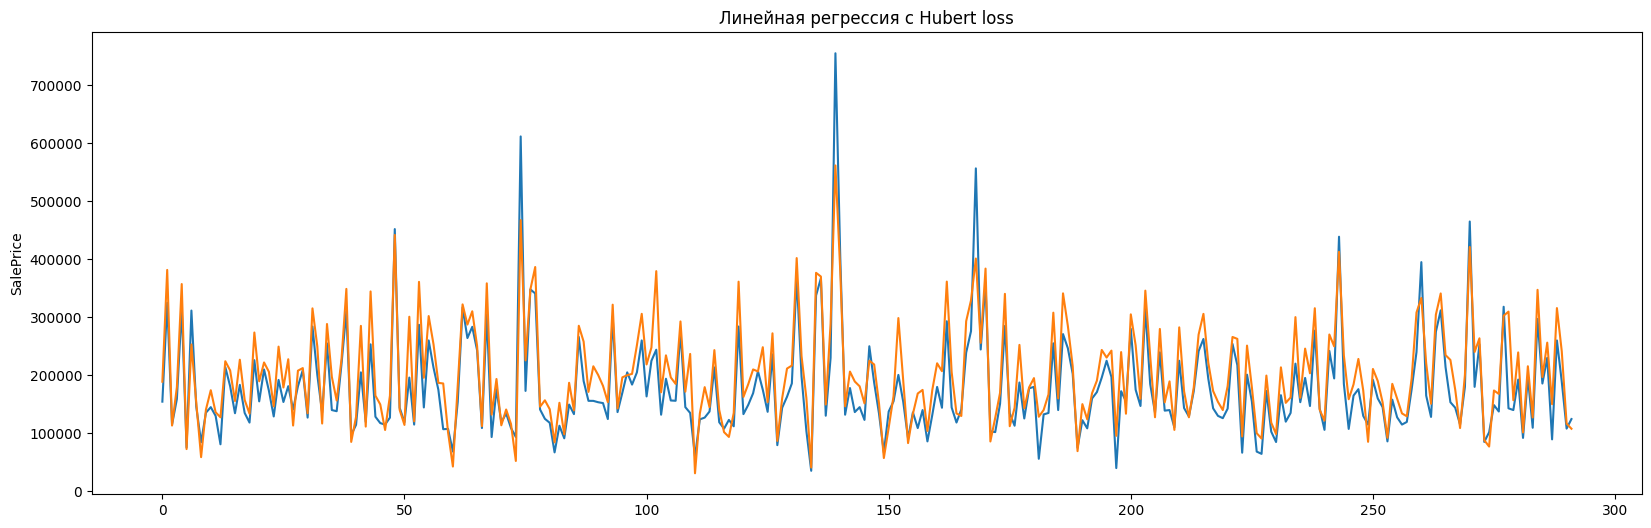

In [571]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred)), y=y_pred)
plt.title('Линейная регрессия с Hubert loss')

In [572]:
en = ElasticNet(random_state=SEED)
en.fit(x_train_norm, y_train)
x_test_norm = scaler.fit_transform(x_test)
y_pred = en.predict(x_test_norm)

print('Линейная регрессия с ElasticNet регуляризацией на тестовом мини-наборе данных:')
print(f'R2: {r2_score(y_test, y_pred)*100: .2f} %',)
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f} %')

Линейная регрессия с ElasticNet регуляризацией на тестовом мини-наборе данных:
R2:  44.12 %
MAPE: 28.14 %


Предскзания значительно сглажены по сравнению с реальными данными, эффект от регуляризации приводит к более плавным предсказаниям, не следуюя за резкими изменениями в данных. Модель не улавливает экстремальные значения, хотя и отображает общую тенденцию

Text(0.5, 1.0, 'Линейная регрессия с ElasticNet регуляризацией')

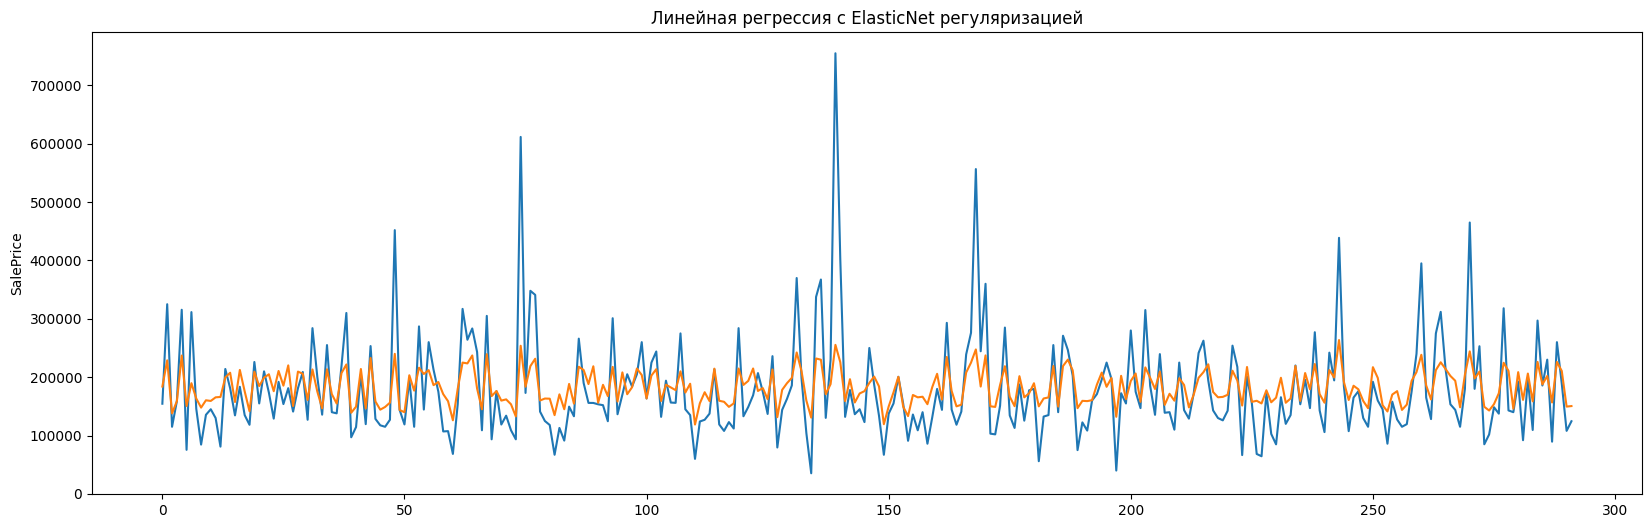

In [574]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred)), y=y_pred)
plt.title('Линейная регрессия с ElasticNet регуляризацией')

## Градиентный бустинг

Целевая метрика R2 для градиентного бустинга выше, чем у линейной регрессии.

In [575]:
import lightgbm as lgbm
data= lgbm.Dataset(data=x_train, label=y_train)
params = {
    "random_state": SEED,
    "objective": "regression",
    "boosting_type": "gbdt",
    "verbose": -1,
}
boostiong = lgbm.train(train_set=data, params=params)
y_pred = boostiong.predict(x_test)

print('Градиентный бустинг LightGBM на тестовом мини-наборе данных:')
print(f'R2: {r2_score(y_test, y_pred)*100: .2f} %',)
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f} %')

Градиентный бустинг LightGBM на тестовом мини-наборе данных:
R2:  89.33 %
MAPE: 10.10 %


График спрогнозированных значений на тестовом наборе данных. Модель лучше описывает целевые значения, однако все еще занижает пиковые.

Text(0.5, 1.0, 'Градиентный бустинг LightGBM ')

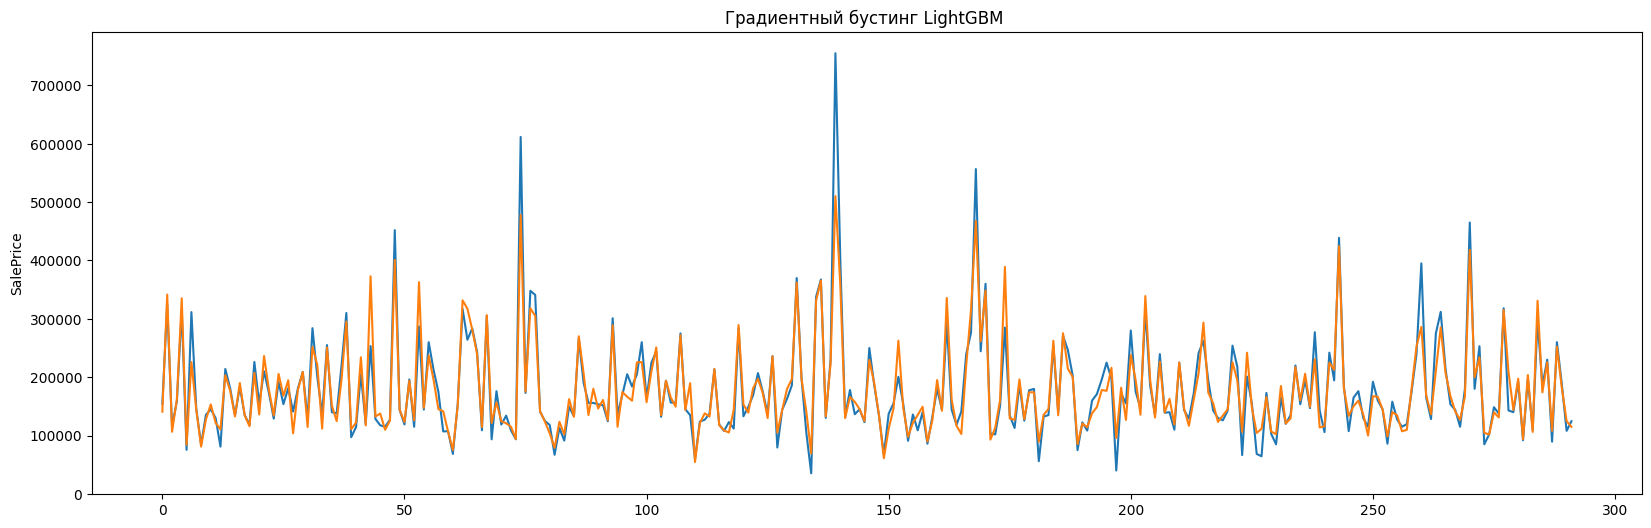

In [576]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred)), y=y_pred)
plt.title('Градиентный бустинг LightGBM ')

Из анализа моделей с паматерами по умолчанию следует, что модель градиентного бустинга оказывается лучше линейнй регрессии.

## Поиск оптимальных гиперпараметров

Для подбора оптимальных гиперпараметров используем фреймворк optuna. По умолчанию будем использовать метод Tree-structured Parzen Estimator - баесовскую оптимизацию: на основе предыдущих попыток выбираются новые гиперпараметры, которые с большей вероятностью улучшат результат.

In [578]:
import optuna
from sklearn.model_selection import cross_val_score, KFold

def regression_objective(trial):
    regressor_name = trial.suggest_categorical('regression',['HuberRegressor', 'ElasticNet'] )
    if regressor_name =='HuberRegressor':
        epsilon = trial.suggest_int('epsilon', 1, 60)
        regressor_obj = HuberRegressor(epsilon = epsilon, max_iter=1000)
    else:
        alpha = trial.suggest_float('alpha', 0,  3)
        l1_ratio = trial.suggest_float('l1_ratio', 0,  1)
        regressor_obj = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    regressor_obj.fit(x_train_norm, y_train)
    y_pred = regressor_obj.predict(x_test_norm)
    return r2_score(y_test, y_pred)

def lgbm_objective(trial):
    data= lgbm.Dataset(data=x_train, label=y_train)
    params = {
      "random_state": SEED,
      "objective": "regression",
      "boosting_type": "gbdt",
      "verbose": -1,
      "num_leaves": trial.suggest_int("num_leaves", 2, 256),
      "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
      "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
      "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    '''
    kf = KFold(n_splits=10, shuffle=True, random_state=SEED)
    cv_results = lgbm.cv(
        params=params,
        train_set=data,
        folds=kf,
        return_cvbooster=True
    )

    score = cv_results["valid l2-mean"][-1]
    '''

    boosting = lgbm.train(train_set=data, params=params)
    y_pred = boosting.predict(x_test)

    return r2_score(y_test, y_pred)


Поиск оптимальных параметров для градиентного бустинга

In [848]:
study = optuna.create_study(direction = 'maximize')
study.optimize(lgbm_objective, n_trials=500)

[I 2024-08-31 23:32:02,229] A new study created in memory with name: no-name-44f73bbf-a785-4136-aa00-121cc4acf2d7
[I 2024-08-31 23:32:02,366] Trial 0 finished with value: 0.8949885591772296 and parameters: {'num_leaves': 184, 'feature_fraction': 0.4480887118014013, 'bagging_fraction': 0.6610038667367115, 'bagging_freq': 1, 'min_child_samples': 11}. Best is trial 0 with value: 0.8949885591772296.
[I 2024-08-31 23:32:02,515] Trial 1 finished with value: 0.8950858629024514 and parameters: {'num_leaves': 194, 'feature_fraction': 0.6452362276151543, 'bagging_fraction': 0.9334236317466031, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 1 with value: 0.8950858629024514.
[I 2024-08-31 23:32:02,542] Trial 2 finished with value: 0.8139333955394623 and parameters: {'num_leaves': 10, 'feature_fraction': 0.9590864454973886, 'bagging_fraction': 0.5775769517782006, 'bagging_freq': 4, 'min_child_samples': 97}. Best is trial 1 with value: 0.8950858629024514.
[I 2024-08-31 23:32:02,584] Tria

Подобранные параметры

In [850]:
print("Best trial params", study.best_trial.params)

Best trial params {'num_leaves': 10, 'feature_fraction': 0.45358167527577264, 'bagging_fraction': 0.8696506478404141, 'bagging_freq': 7, 'min_child_samples': 6}


Целевая метрика R2 улучшилась с 89 % до 93.16 %

In [849]:
data= lgbm.Dataset(data=x_train, label=y_train)
params = {
      "random_state": SEED,
      "objective": "regression",
      "boosting_type": "gbdt",
      "verbose": -1}
params.update(study.best_trial.params)
lgbm_params = params
boosting = lgbm.train(train_set=data, params=lgbm_params)
y_pred_boosting = boosting.predict(x_test)

print('LightGBM на тестовом мини-наборе данных:')
print(f'R2: {r2_score(y_test, y_pred_boosting)*100: .2f} %',)
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f} %')

LightGBM на тестовом мини-наборе данных:
R2:  93.16 %
MAPE: 10.10 %


Поиск оптимальных параметров для линейной регрессии

In [579]:
study = optuna.create_study(direction = 'maximize')
study.optimize(regression_objective, n_trials=100)
print("Best trial", study.best_trial)

[I 2024-08-31 18:35:37,867] A new study created in memory with name: no-name-adad1c65-1ce6-46ec-a8c5-c3dbdfaa7748
[I 2024-08-31 18:35:37,877] Trial 0 finished with value: 0.7846707751972584 and parameters: {'regression': 'ElasticNet', 'alpha': 0.03500060357515533, 'l1_ratio': 0.27471870033328116}. Best is trial 0 with value: 0.7846707751972584.
[I 2024-08-31 18:35:37,957] Trial 1 finished with value: 0.8149525823513353 and parameters: {'regression': 'HuberRegressor', 'epsilon': 40}. Best is trial 1 with value: 0.8149525823513353.
[I 2024-08-31 18:35:38,027] Trial 2 finished with value: 0.8150025834755799 and parameters: {'regression': 'HuberRegressor', 'epsilon': 56}. Best is trial 2 with value: 0.8150025834755799.
[I 2024-08-31 18:35:38,030] Trial 3 finished with value: 0.39981172756731587 and parameters: {'regression': 'ElasticNet', 'alpha': 0.9103006160177681, 'l1_ratio': 0.3186811496980735}. Best is trial 2 with value: 0.8150025834755799.
[I 2024-08-31 18:35:38,033] Trial 4 finishe

Best trial FrozenTrial(number=21, state=TrialState.COMPLETE, values=[0.8151953192034125], datetime_start=datetime.datetime(2024, 8, 31, 18, 35, 38, 884727), datetime_complete=datetime.datetime(2024, 8, 31, 18, 35, 38, 950726), params={'regression': 'HuberRegressor', 'epsilon': 30}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'regression': CategoricalDistribution(choices=('HuberRegressor', 'ElasticNet')), 'epsilon': IntDistribution(high=60, log=False, low=1, step=1)}, trial_id=21, value=None)


Лучшей оказалась модель линейной регрессии с Huber loss и параметром эпсилон раным 22.

In [581]:
print("Best trial params", study.best_trial.params)

Best trial params {'regression': 'HuberRegressor', 'epsilon': 30}


Метрика R2 для линейной регрессии повысилась с 76.86 % до 81.52 %.

In [583]:
hr = HuberRegressor(epsilon=study.best_trial.params['epsilon'], max_iter=1000)
hr.fit(x_train_norm, y_train)
x_test_norm = scaler.fit_transform(x_test)
y_pred_hr = hr.predict(x_test_norm)

print('Линейная регрессия на тестовом мини-наборе данных:')
print(f'R2: {r2_score(y_test, y_pred_hr)*100: .2f} %',)
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_hr) * 100:.2f} %')

Линейная регрессия на тестовом мини-наборе данных:
R2:  81.52 %
MAPE: 16.36 %


## Сравнение моделей с подобранными гиперпараметрами

Графики предсказанных значений на тестовом мини-наборе данных

[]

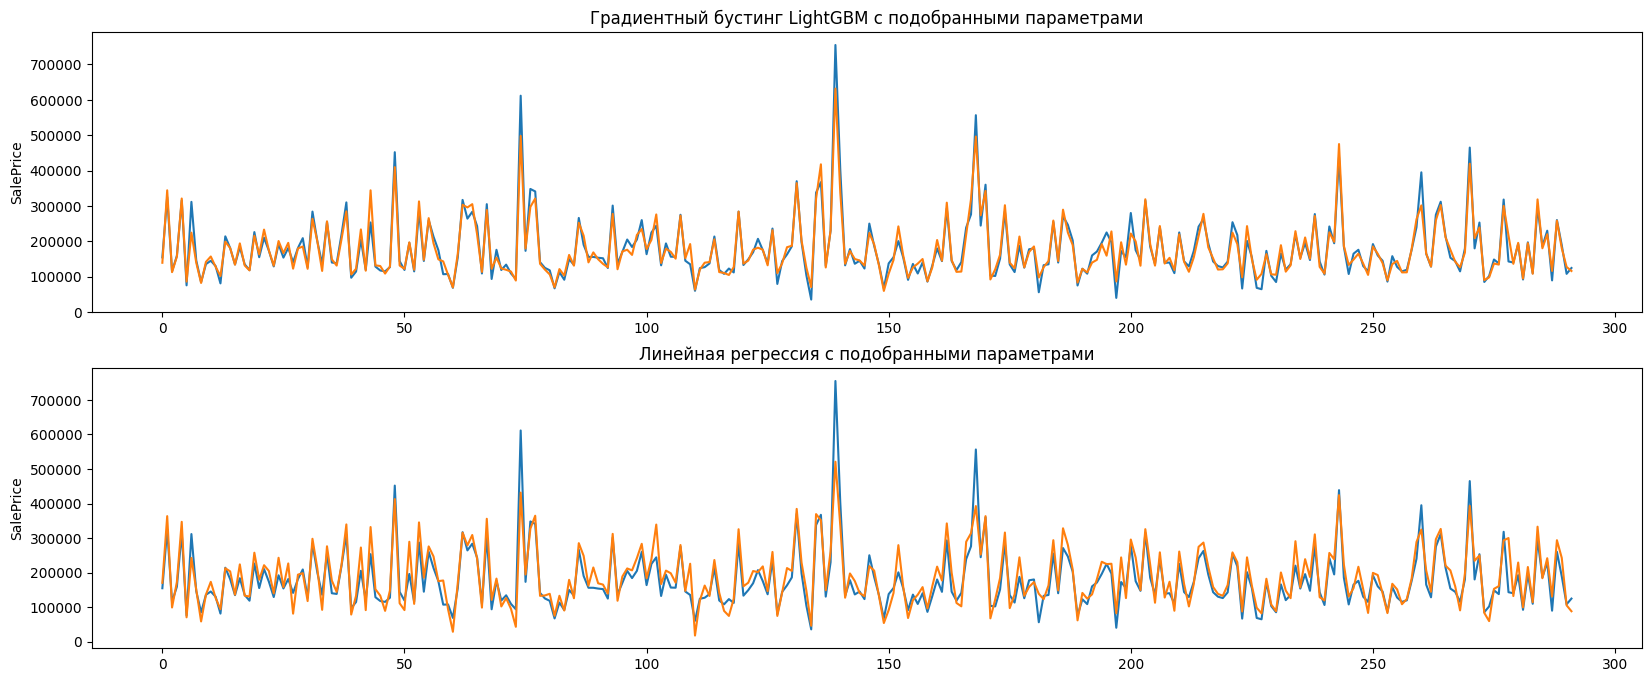

In [591]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred_boosting)), y=y_pred_boosting)
plt.title('Градиентный бустинг LightGBM с подобранными параметрами')

plt.subplot(2, 1, 2)
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred_hr)), y=y_pred_hr)
plt.title('Линейная регрессия с подобранными параметрами')
plt.plot()

Графически оценим предсказания для тестового мини-набора. Из графиков видно, что предсказания модели градиентного бустинга лежат ближе к красной линии и образуют более узкую полосу, чем предсказания линейной регреccии, следовательно модель градиентного бустинга лучше моделирует тестовые значения.

В качестве модели победителя выберем градиентный бустинг.

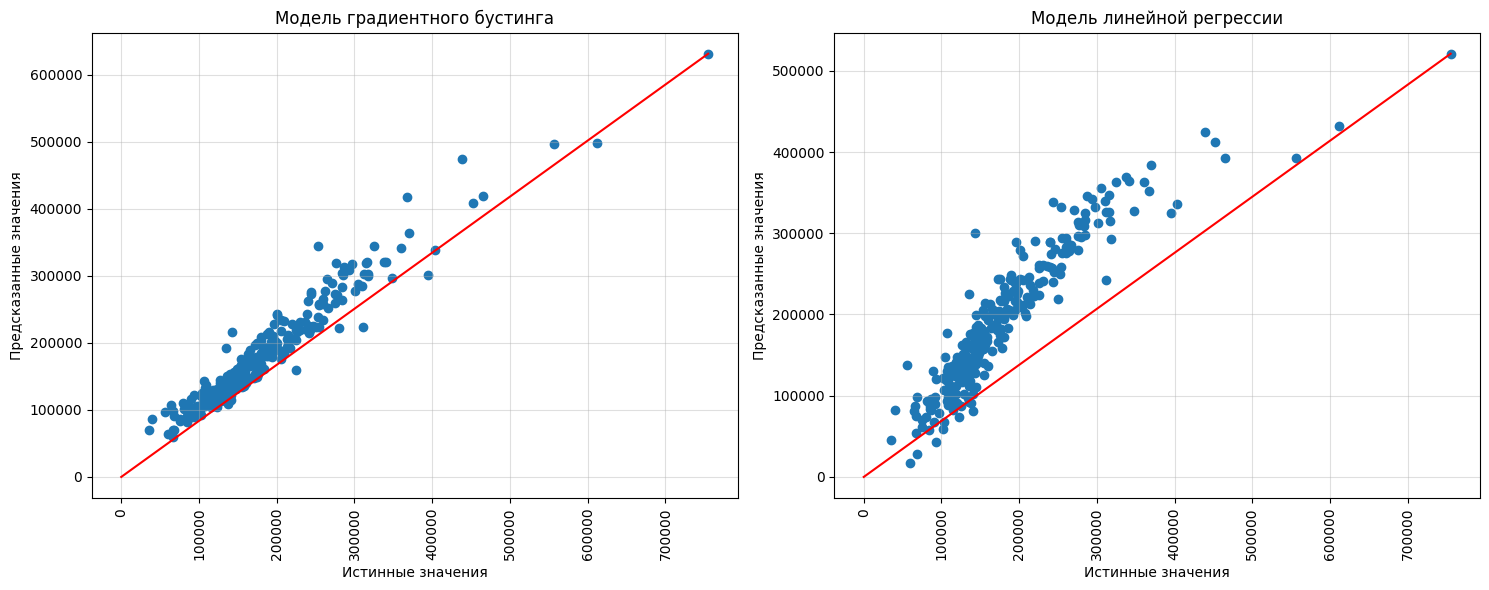

In [605]:
fig =plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_boosting)
plt.title("Модель градиентного бустинга")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, np.max(y_test)], [0, np.max(y_pred_boosting)], "r-")
plt.grid(alpha=0.4)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_hr)
plt.title("Модель линейной регрессии")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, np.max(y_test)], [0, np.max(y_pred_hr)], "r-")
plt.grid(alpha=0.4)
plt.xticks(rotation=90)

fig.tight_layout()

plt.show()

Оценим важность признаков модели


In [609]:
feature_importances = boosting.feature_importance()

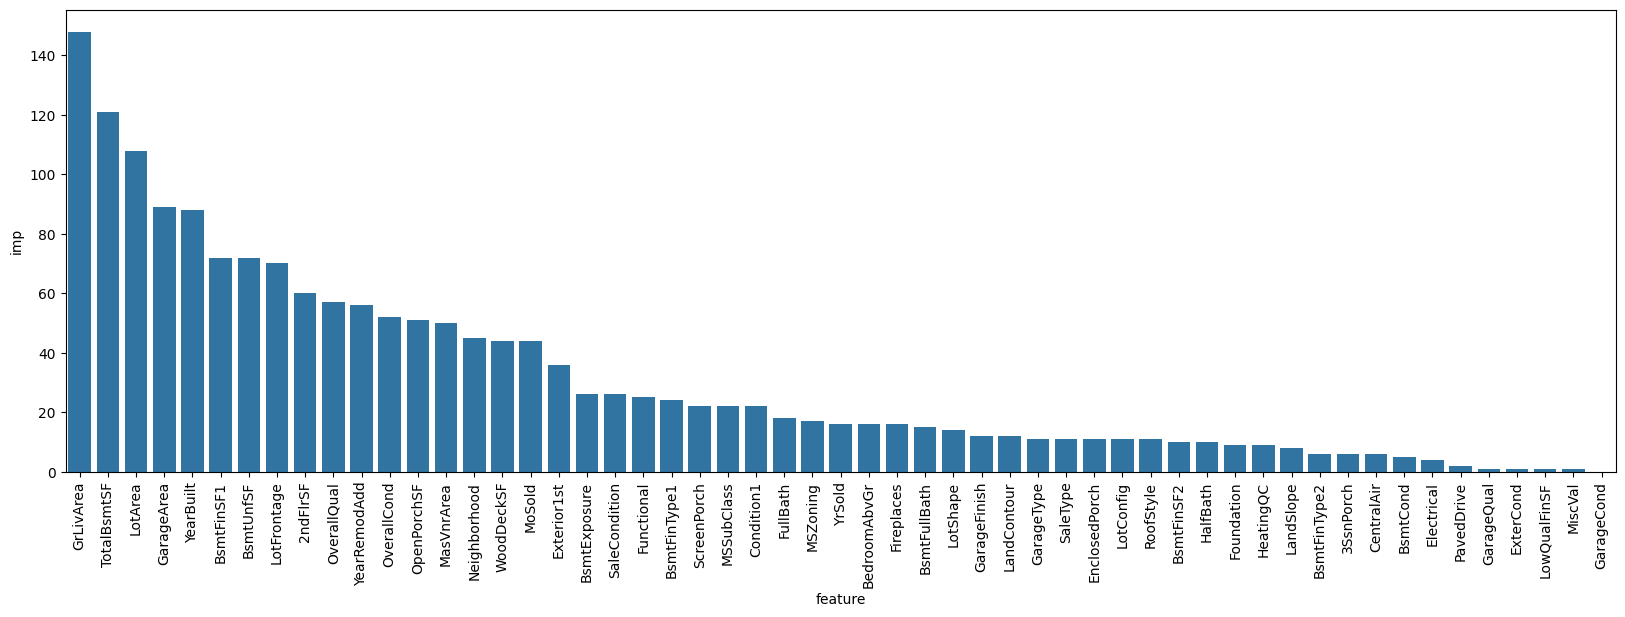

In [610]:
columns = x_train.columns

feature_importances_df = pd.DataFrame(
    {
        "imp": feature_importances,
        "feature": columns
    }
).sort_values(by=["imp"], ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(data=feature_importances_df, x="feature", y="imp")
plt.xticks(rotation=90)

Часть важных признаков была корректно выявлена с помощью корреляционного анализа в предыдущем модуле.

## Обучение модели на всех данных

In [851]:
data= lgbm.Dataset(data=X, label=y)
boosting = lgbm.train(train_set=data, params=lgbm_params)

In [833]:
y_test_pred = boosting.predict(test_df)

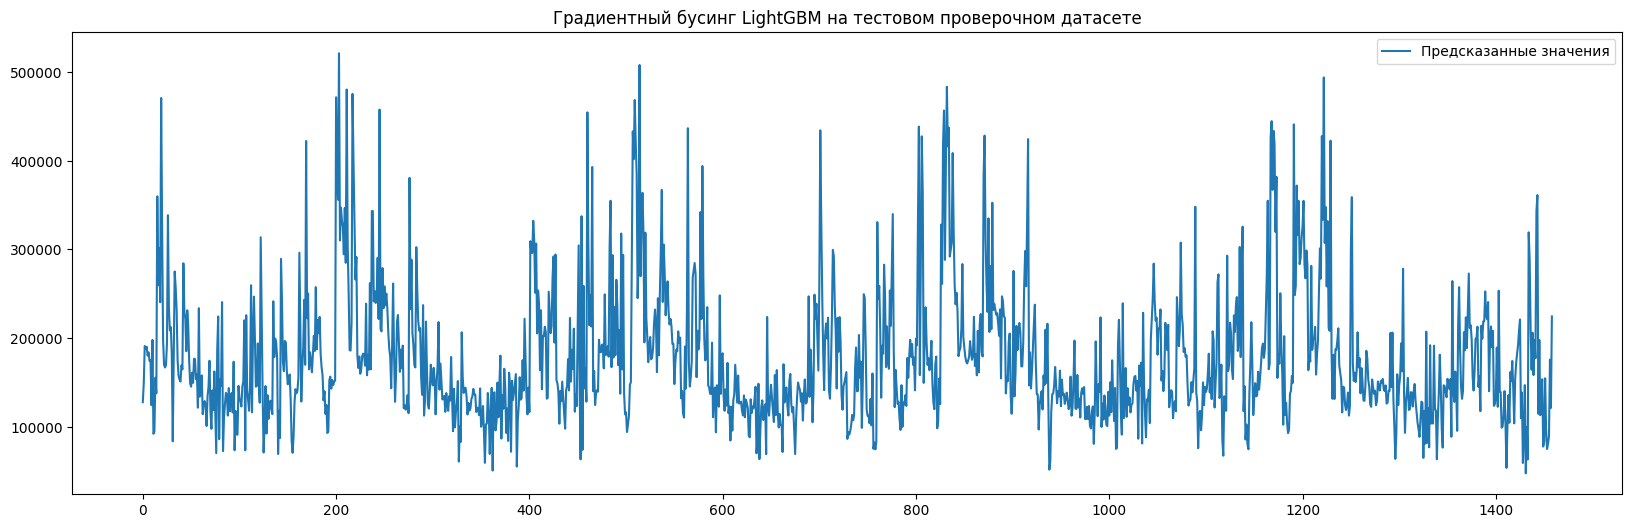

In [853]:
# График прогнозных значений по отложенной тестовой выборке

plt.figure(figsize=(20, 6))
plt.title("Градиентный бусинг LightGBM на тестовом проверочном датасете");
sns.lineplot(x=range(len(test_df)), y=y_test_pred, label="Предсказанные значения");
plt.legend()


In [854]:
submission_df = pd.DataFrame()
submission_df ['Id'] = id_test
submission_df ['SalePrice'] = y_test_pred
submission_df.to_csv(f'Regression\\submission.csv', index=False)